In [1]:
# Import essential modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
plt.rcParams["figure.dpi"] = 360

In [2]:
# Set pandas options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [75]:
# Load time series
lorenz = pd.read_csv('./data/LorenzTS_tau10.csv')[90:]

In [43]:
lorenz['x'] = lorenz['x'].subtract(min(lorenz['x'])) / (max(lorenz['x']) - min(lorenz['x']))
lorenz['y'] = lorenz['y'].subtract(min(lorenz['y'])) / (max(lorenz['y']) - min(lorenz['y']))
lorenz['z'] = lorenz['z'].subtract(min(lorenz['z'])) / (max(lorenz['z']) - min(lorenz['z']))

In [76]:
lorenz

time          x          y          z
0     0.99  -9.475078  -8.569651  29.347353
1     1.09  -8.211670  -6.861453  28.382710
2     1.19  -7.218148  -6.712718  26.186048
3     1.29  -7.293257  -7.929780  24.622660
4     1.39  -8.349112  -9.695033  24.925103
5     1.49  -9.589907 -10.476803  27.240298
6     1.59  -9.720119  -9.033825  29.361260
7     1.69  -8.494511  -7.006686  28.853500
8     1.79  -7.271203  -6.492244  26.611323
9     1.89  -7.097172  -7.530586  24.688010
10    1.99  -8.036862  -9.378090  24.507983
11    2.09  -9.426934 -10.617086  26.611292
12    2.19  -9.916476  -9.552996  29.226492
13    2.29  -8.824665  -7.262739  29.311718
14    2.39  -7.390550  -6.321424  27.120878
15    2.49  -6.934535  -7.120817  24.864149
16    2.59  -7.703645  -8.974771  24.167160
17    2.69  -9.179668 -10.629820  25.908015
18    2.79 -10.047091 -10.092414  28.903909
19    2.89  -9.195171  -7.648622  29.719041
20    2.99  -7.588411  -6.221154  27.710633
21    3.09  -6.819742  -6.714084  25.162002
22    3.19  -7.363101  -8.496540  23.931344
23    3.29  -8.849959 -10.491335  25.170353
24    3.39 -10.083273 -10.602887  28.367654
25    3.49  -9.587308  -8.179600  30.022775
26    3.59  -7.875827  -6.219498  28.370539
27    3.69  -6.769549  -6.326434  25.591585
28    3.79  -7.031353  -7.959073  23.827856
29    3.89  -8.446186 -10.188593  24.448890
30    3.99  -9.997456 -11.019484  27.610243
31    4.09  -9.970096  -8.858195  30.152576
32    4.19  -8.261160  -6.353595  29.079717
33    4.29  -6.803987  -5.977901  26.161727
34    4.39  -6.727296  -7.381215  23.882190
35    4.49  -7.983459  -9.722038  23.801174
36    4.59  -9.767927 -11.267866  26.652811
37    4.69 -10.297856  -9.661414  30.022302
38    4.79  -8.745908  -6.670941  29.798570
39    4.89  -6.947059  -5.695602  26.879090
40    4.99  -6.473353  -6.784214  24.118215
41    5.09  -7.483275  -9.106346  23.287115
42    5.19  -9.384156 -11.276596  25.552575
43    5.29 -10.510368 -10.524787  29.540890
44    5.39  -9.317416  -7.226962  30.456335
45    5.49  -7.226866  -5.519110  27.745389
46    5.59  -6.296999  -6.191794  24.558919
47    5.69  -6.972957  -8.368809  22.964719
48    5.79  -8.851458 -10.993496  24.403445
49    5.89 -10.538316 -11.329412  28.637468
50    5.99  -9.937623  -8.072879  30.934152
51    6.09  -7.673801  -5.509036  28.750452
52    6.19  -6.233338  -5.632076  25.227426
53    6.29  -6.485476  -7.545837  22.887419
54    6.39  -8.193466 -10.400981  23.327355
55    6.49 -10.316343 -11.904601  27.301110
56    6.59 -10.528771  -9.223994  31.049626
57    6.69  -8.313850  -5.758813  29.856186
58    6.79  -6.328871  -5.143240  26.147531
59    6.89  -6.060572  -6.678819  23.103923
60    6.99  -7.451602  -9.524008  22.457938
61    7.09  -9.803067 -12.060291  25.623069
62    7.19 -10.962138 -10.599553  30.563029
63    7.29  -9.151128  -6.404708  30.961893
64    7.39  -6.645844  -4.786740  27.341541
65    7.49  -5.748526  -5.811280  23.660938
66    7.59  -6.682171  -8.426450  21.922615
67    7.69  -9.001957 -11.650560  23.814852
68    7.79 -11.064863 -11.946984  29.244790
69    7.89 -10.130606  -7.612498  31.838184
70    7.99  -7.263720  -4.675266  28.818599
71    8.09  -5.618555  -4.990805  24.608584
72    8.19  -5.953643  -7.196747  21.831073
73    8.29  -7.972604 -10.642038  22.177129
74    8.39 -10.665544 -12.819388  27.036162
75    8.49 -11.075779  -9.481211  32.035790
76    8.59  -8.265455  -5.025033  30.531891
77    8.69  -5.774426  -4.283668  26.007106
78    8.79  -5.348830  -5.928966  22.276209
79    8.89  -6.824859  -9.142284  21.025298
80    8.99  -9.681607 -12.718945  24.240923
81    9.09 -11.629487 -11.775291  30.877966
82    9.19  -9.673230  -6.222141  32.243437
83    9.29  -6.377681  -3.823833  27.927795
84    9.39  -4.979905  -4.709350  23.349911
85    9.49  -5.700323  -7.362133  20.616977
86    9.59  -8.201030 -11.408341  21.545922
87    9.69 -11.310458 -13.572409  27.842735
88    9.79 -11.262029  -8.754469  33.182417
89    9.89  -7.659227  -3.953399  30.408046
90

In [3]:
# Define the Lorenz system
def lorenz(xyz, t=0, s=10, r=28, b=8/3):
    x,y,z = xyz
    xp = s*(y - x)
    yp = r*x - y - x*z
    zp = x*y - b*z
    return xp, yp, zp

In [4]:
# Set the initial conditions
x0 = 1
y0 = 1
z0 = 1

In [5]:
def getTimeDF(t_lim, n_points):
    t = np.linspace(0, t_lim, n_points)
    sol = odeint(lorenz, [x0,y0,z0], t)
    sol_x,sol_y,sol_z = sol.T
    df = pd.DataFrame({'time':t, 'x':sol_x, 'y':sol_y, 'z':sol_z})
    return df

In [6]:
lorenz_100 = getTimeDF(100)
lorenz_100 = lorenz_100.query('time > 10')
plt.plot(lorenz_100['time'], lorenz_100['z'])
plt.savefig("OL=100.pdf")

TypeError: getTimeDF() missing 1 required positional argument: 'n_points'

In [9]:
lorenz_100.to_csv('lorenz_100.csv')

In [29]:
lorenz_90 = getTimeDF(90, 10130)
lorenz_90 = lorenz_90.query('time > 10')

In [32]:
lorenz_90.to_csv('lorenz_90.csv')

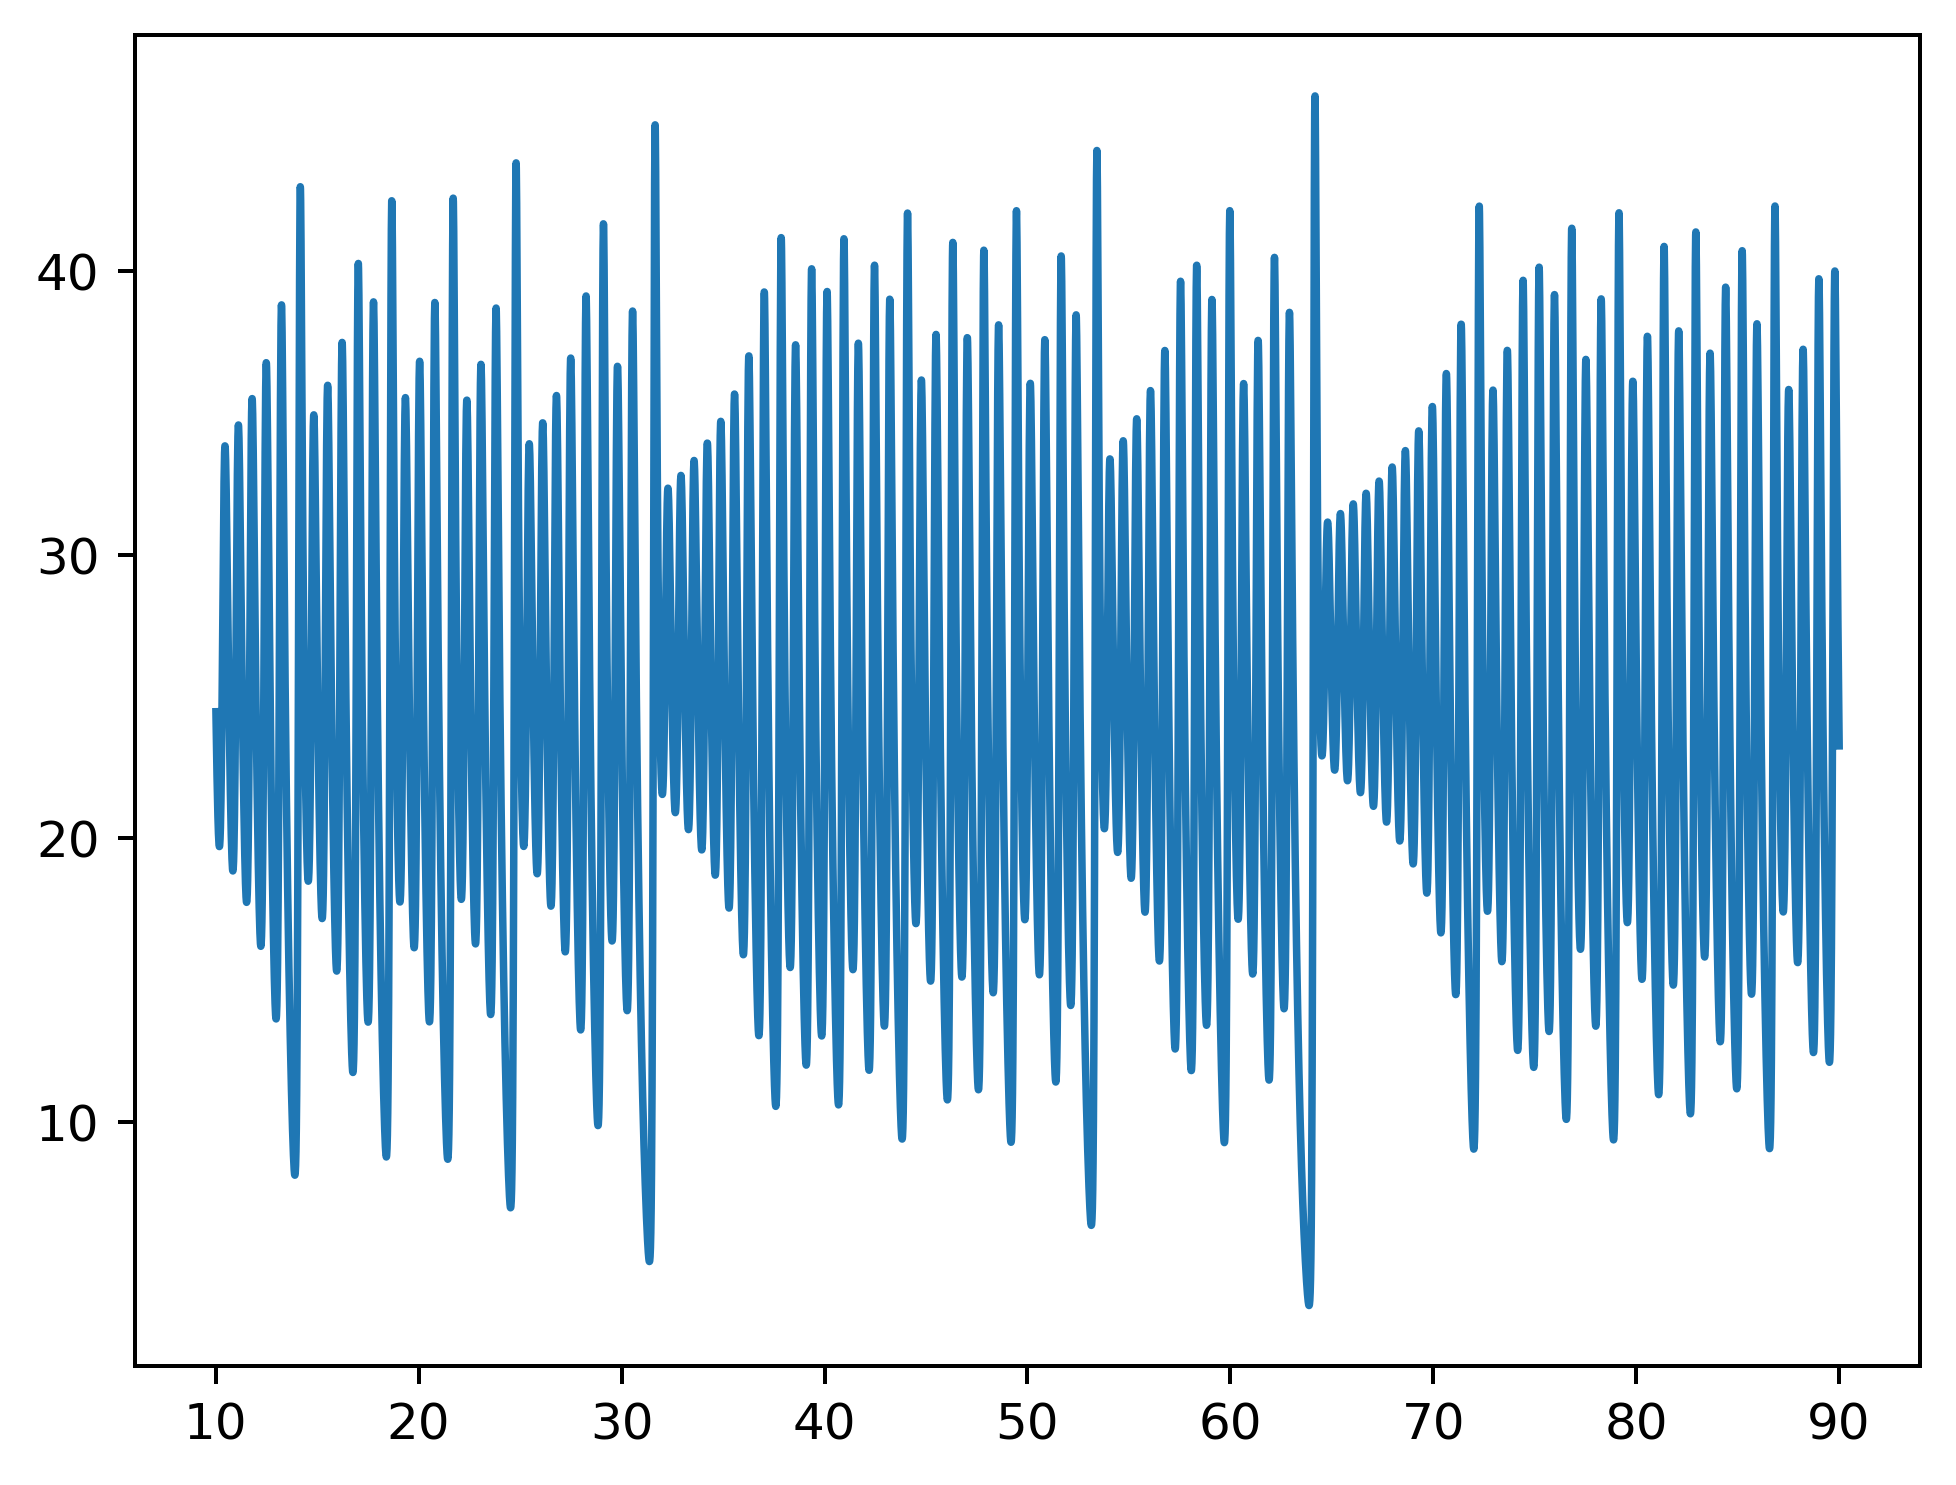

In [31]:
plt.plot(lorenz_90['time'], lorenz_90['z'])

In [43]:
lorenz_80 = getTimeDF(80, 10300)
lorenz_80 = lorenz_80.query('time > 10')

In [46]:
lorenz_80.to_csv('lorenz_80.csv')

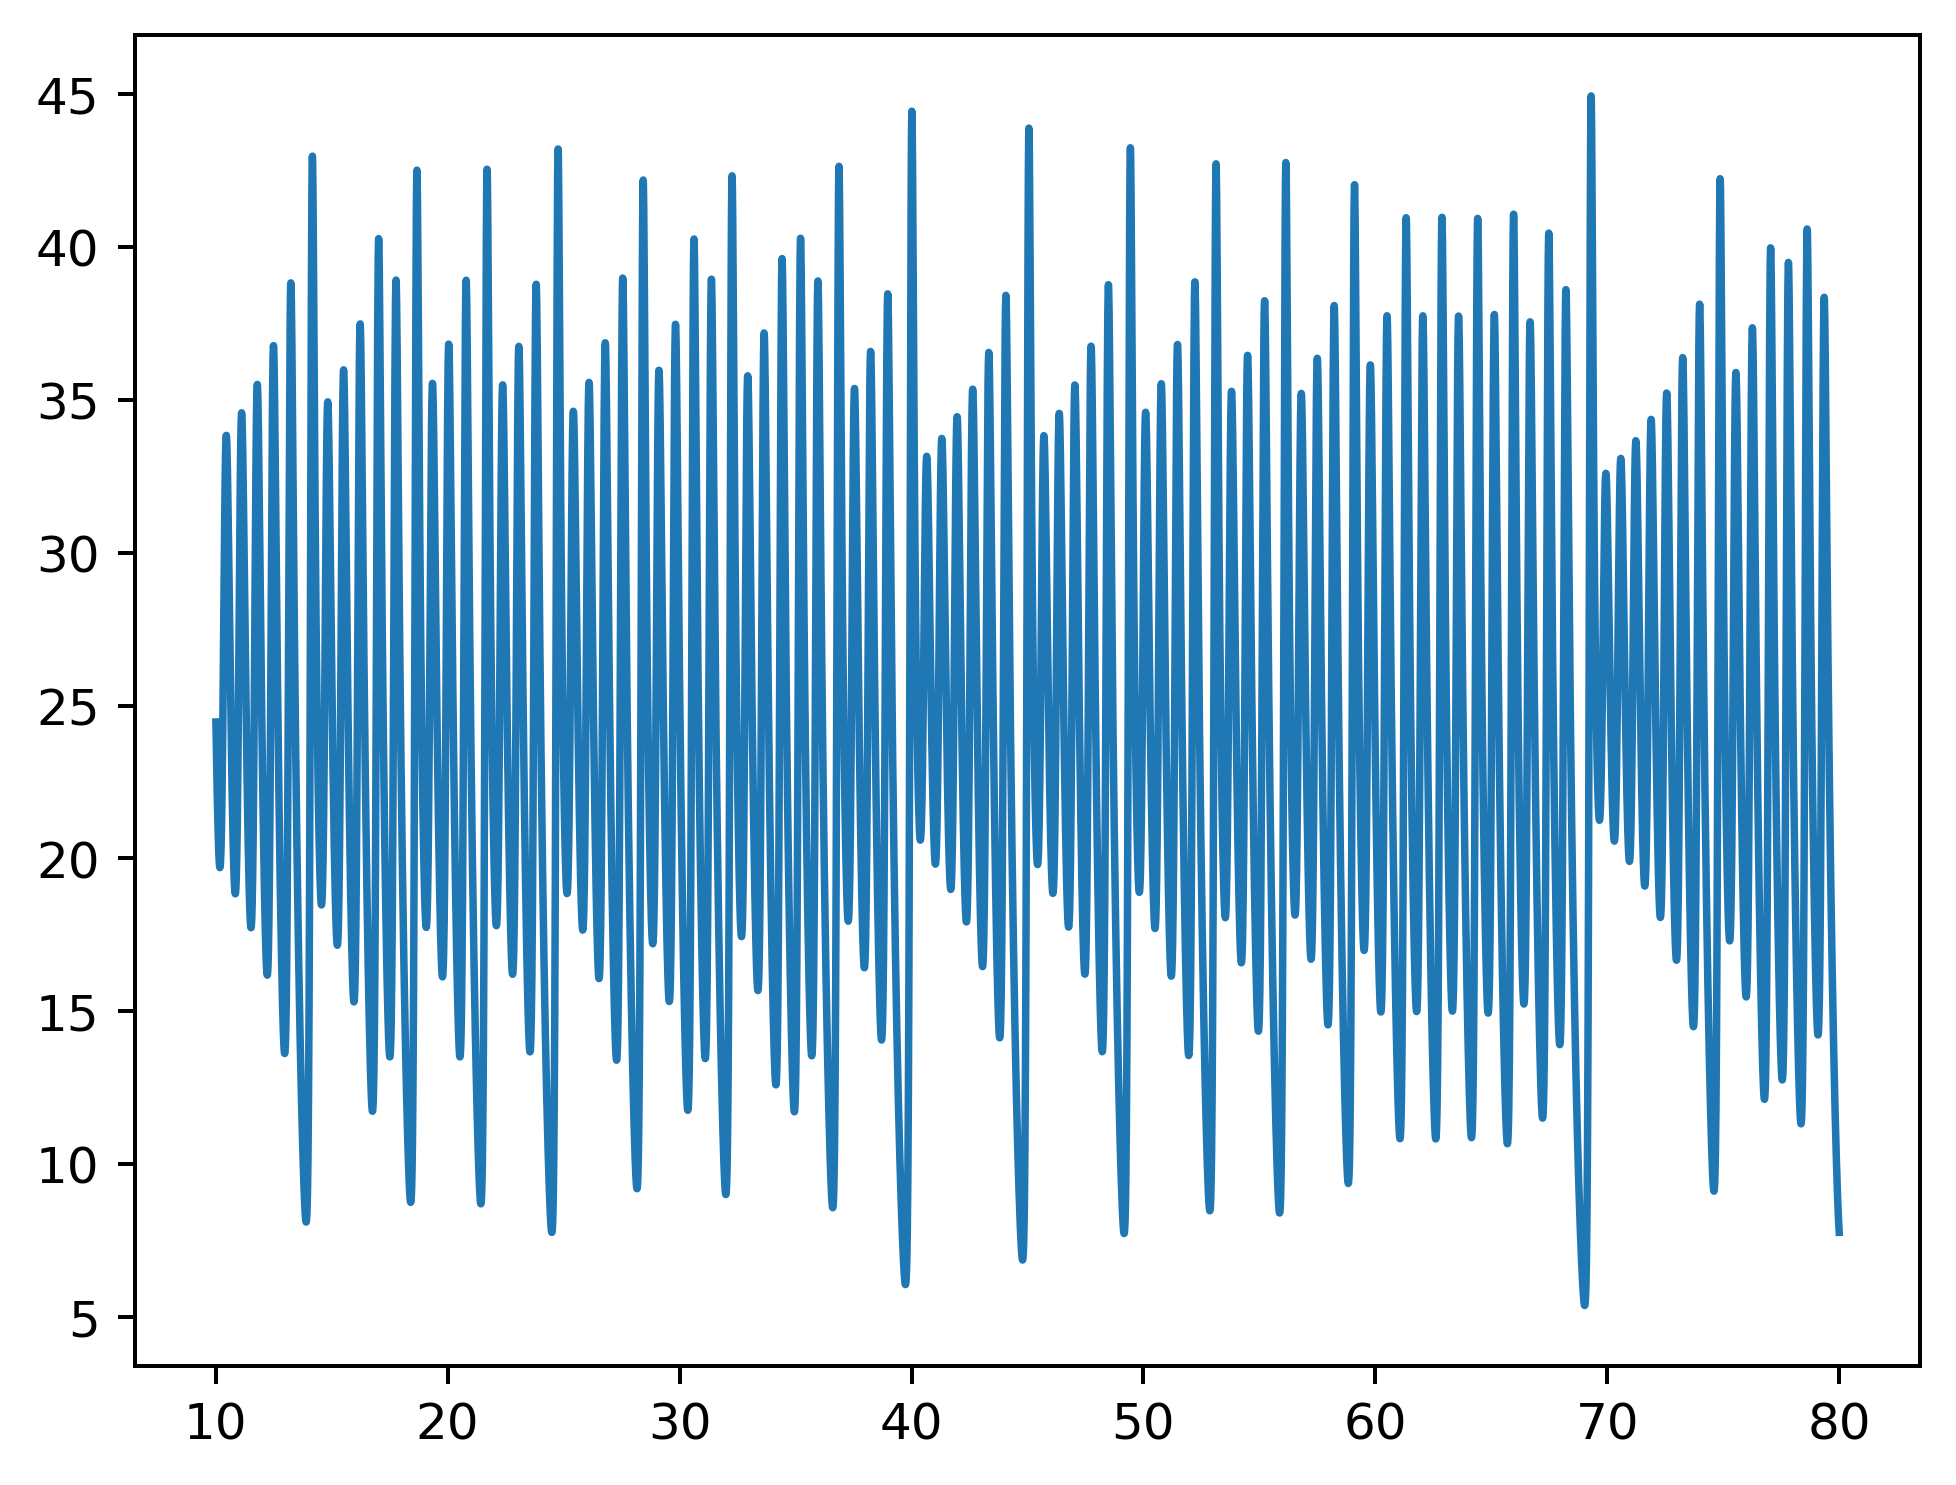

In [45]:
plt.plot(lorenz_80['time'], lorenz_80['z'])

In [51]:
lorenz_70 = getTimeDF(70, 10500)
lorenz_70 = lorenz_70.query('time > 10')

In [54]:
lorenz_70.to_csv('lorenz_70.csv')

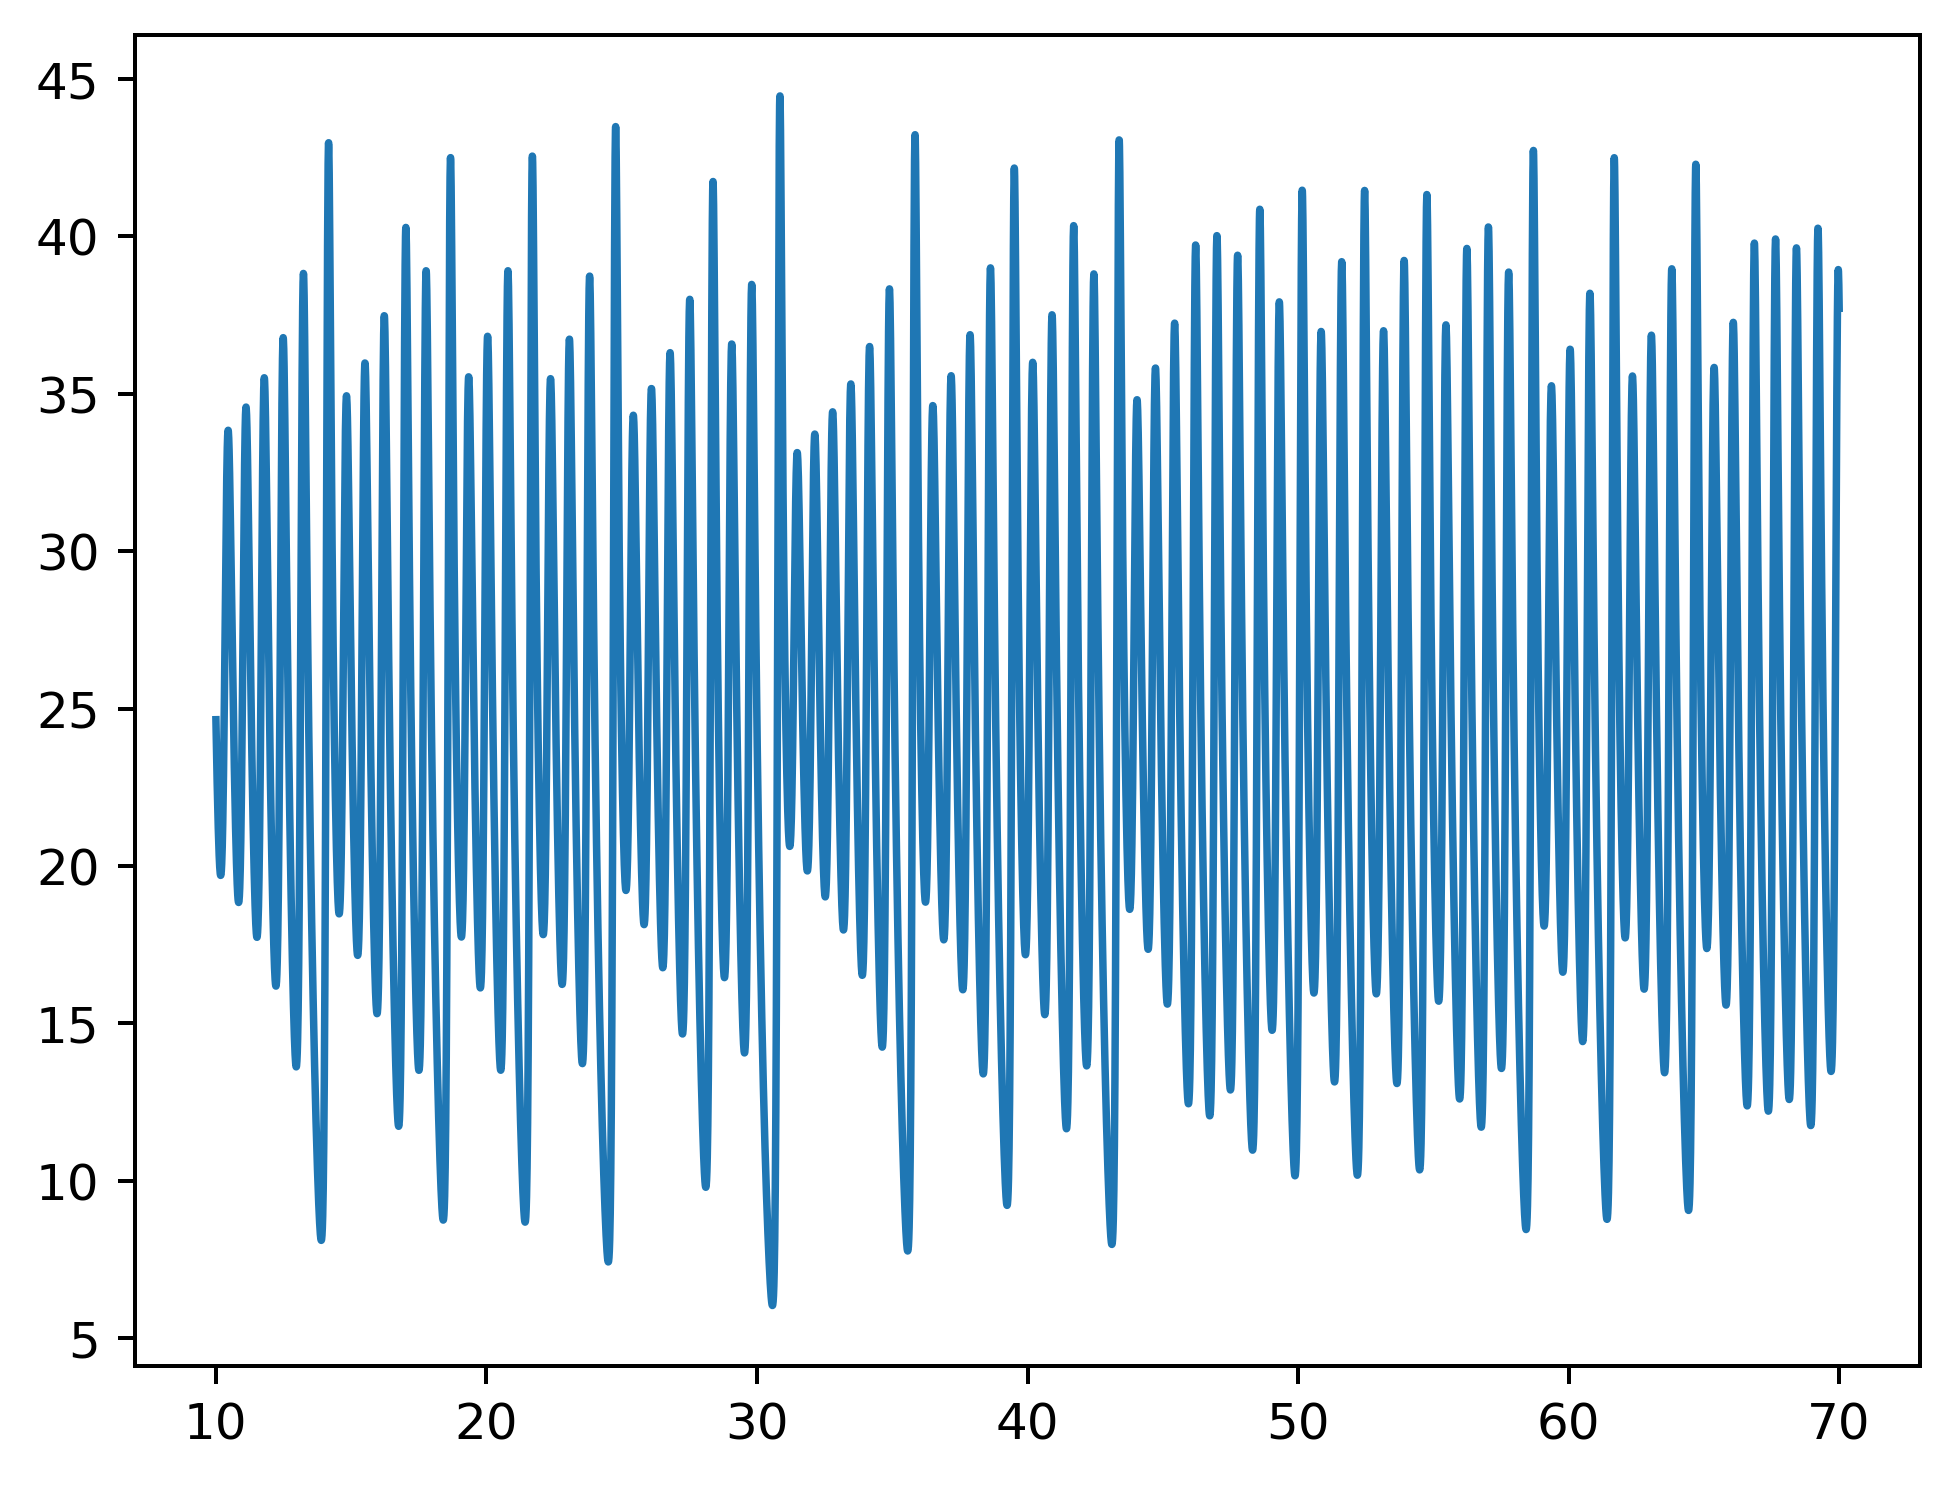

In [55]:
plt.plot(lorenz_70['time'], lorenz_70['z'])

In [58]:
lorenz_60 = getTimeDF(60, 10800)
lorenz_60 = lorenz_60.query('time > 10')

In [61]:
lorenz_60.to_csv('lorenz_60.csv')

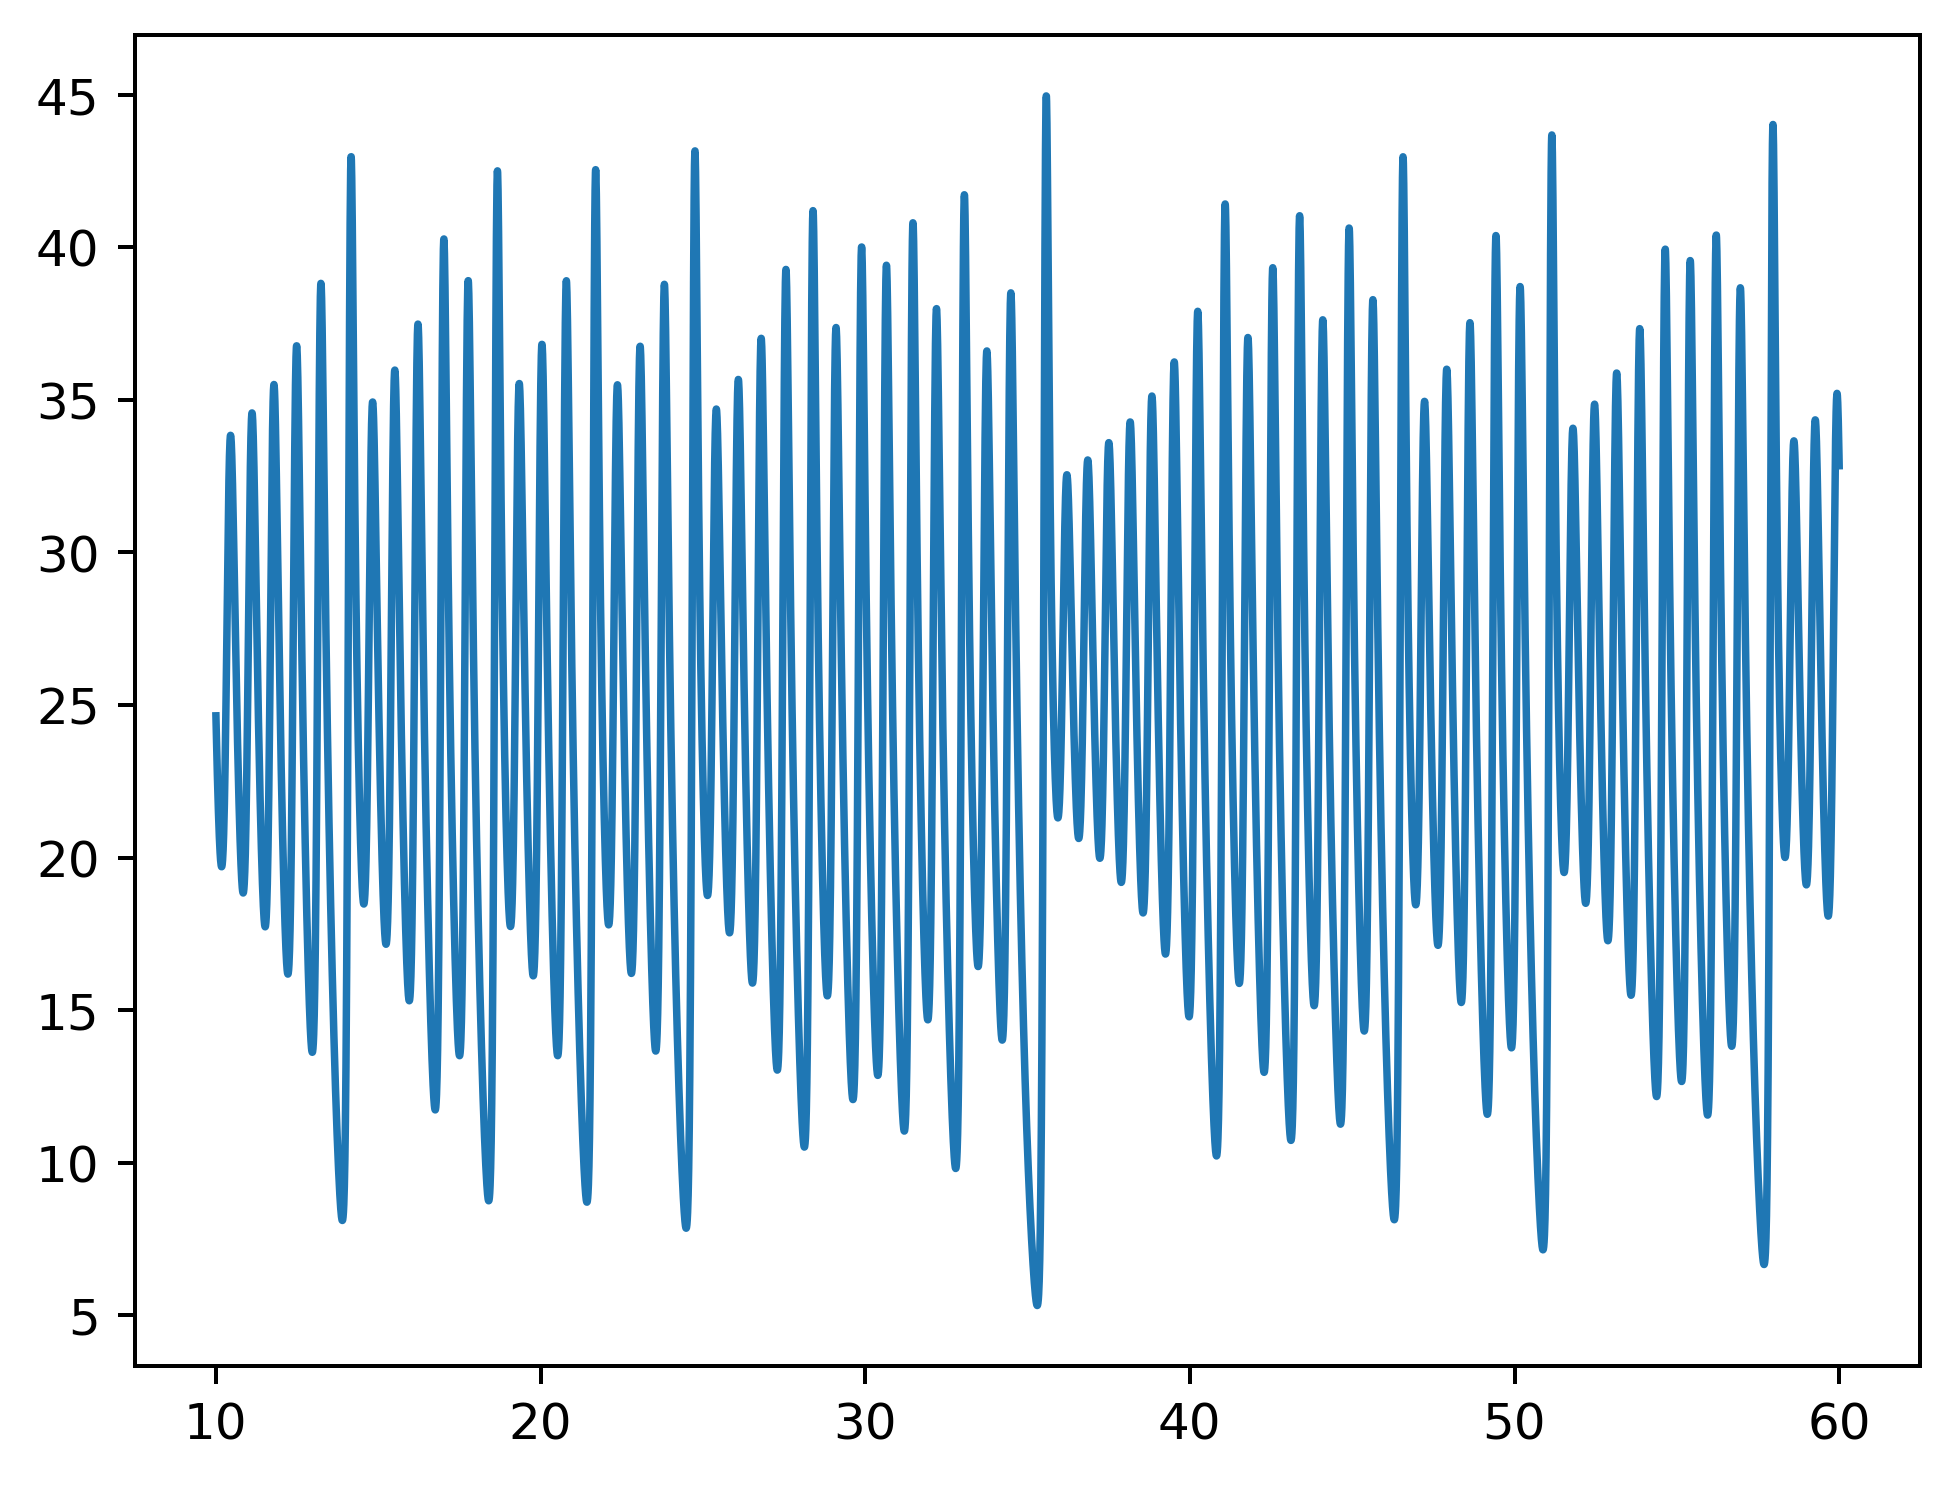

In [60]:
plt.plot(lorenz_60['time'], lorenz_60['z'])

In [72]:
lorenz_50 = getTimeDF(50, 11250)
lorenz_50 = lorenz_50.query('time > 10')

In [75]:
lorenz_50.to_csv('lorenz_50.csv')

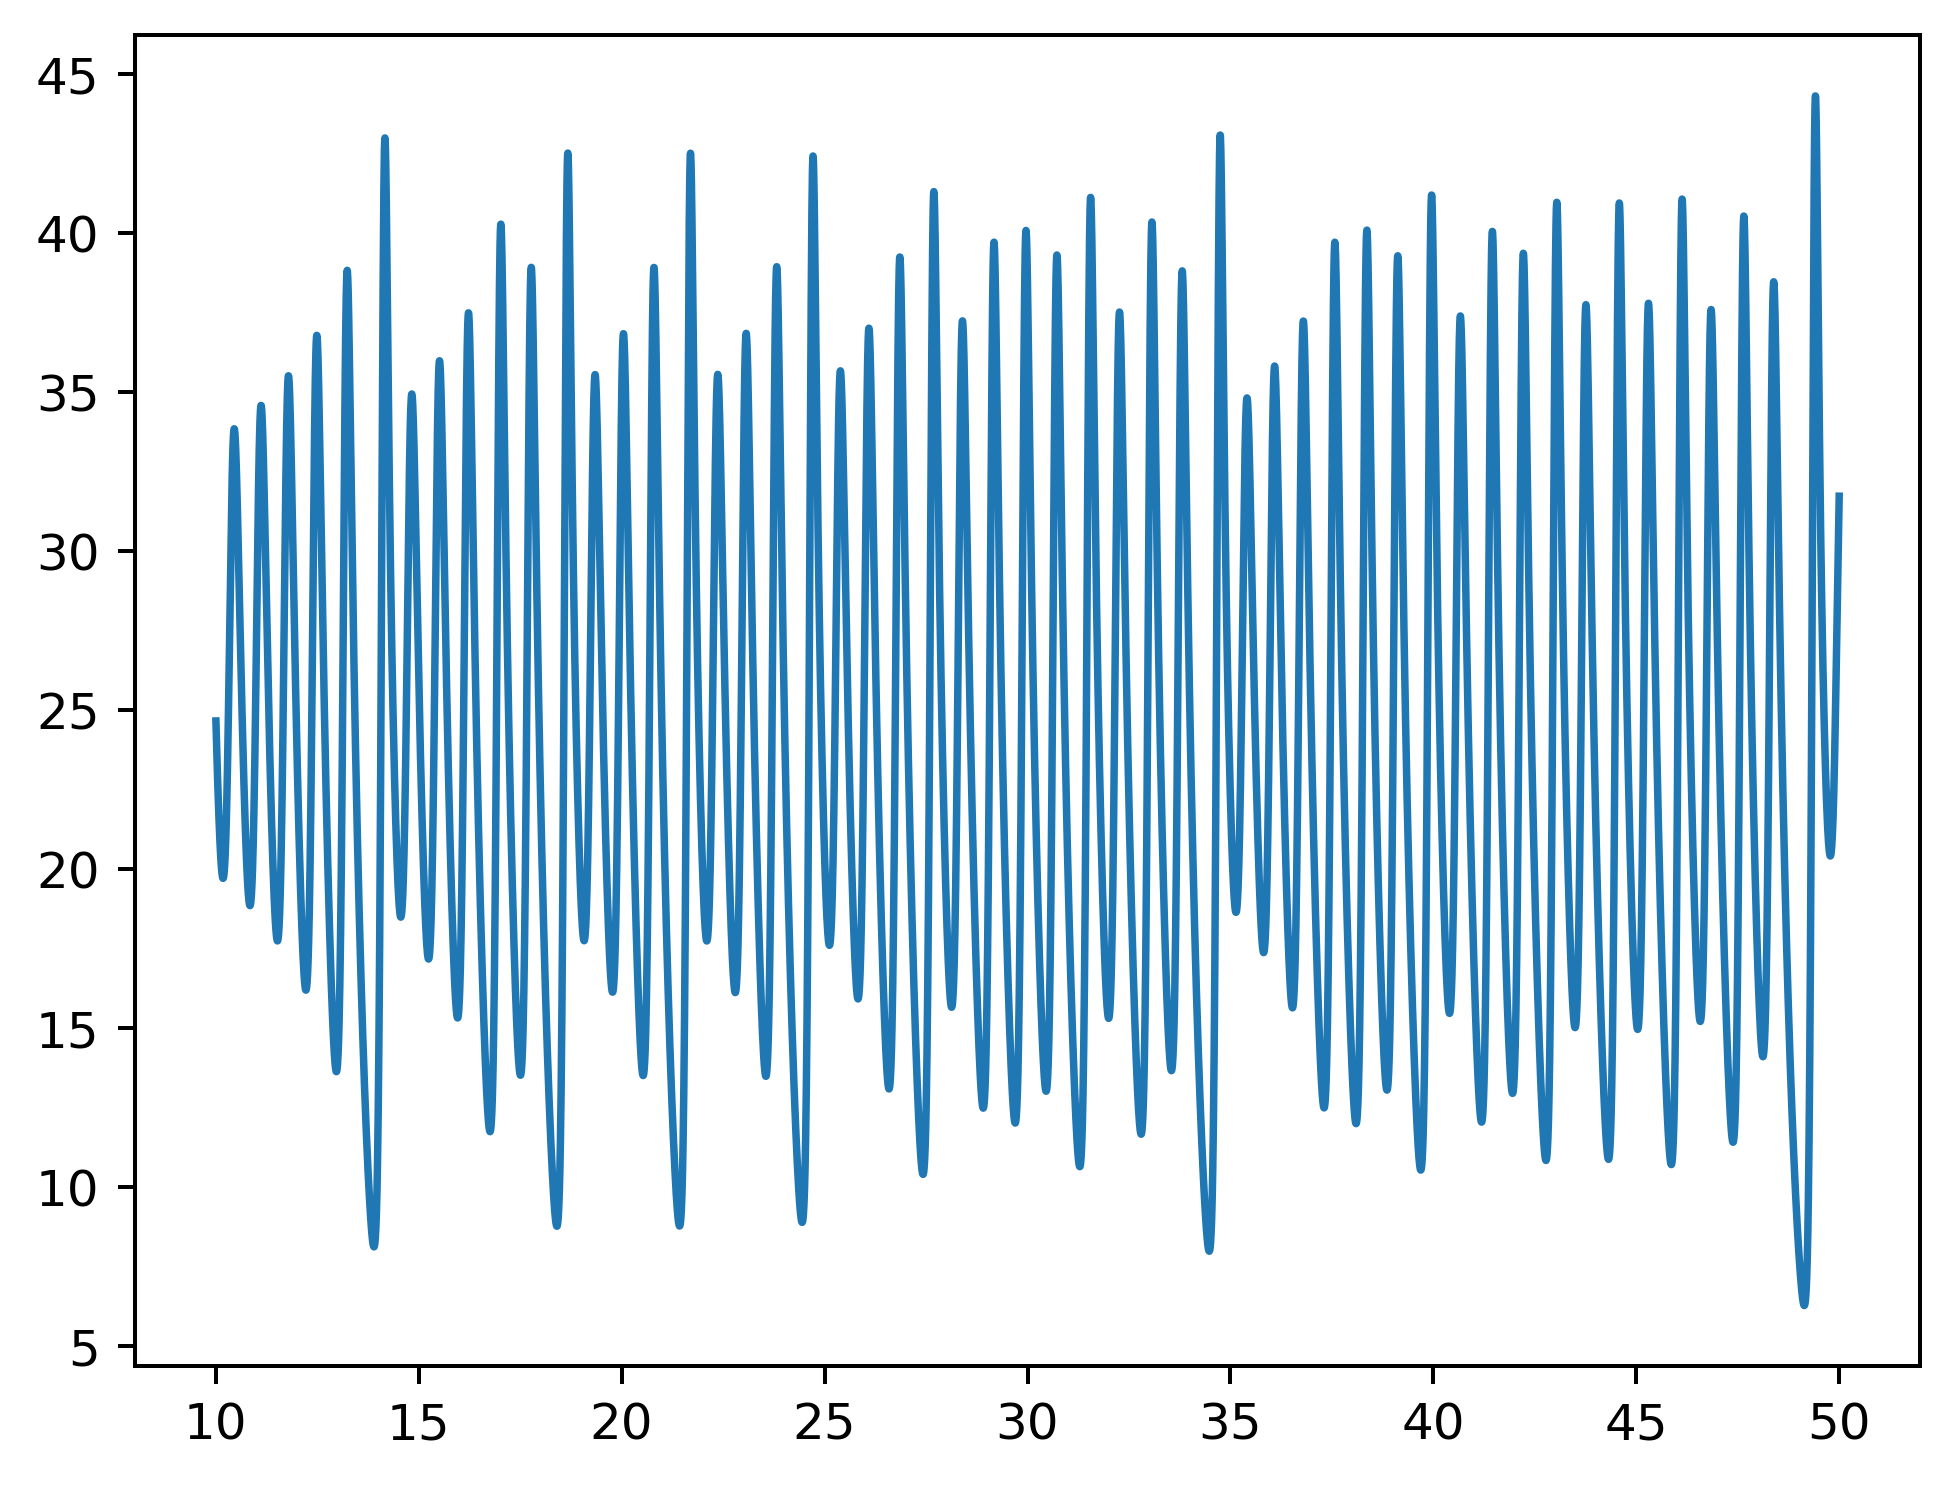

In [74]:
plt.plot(lorenz_50['time'], lorenz_50['z'])

In [78]:
lorenz_40 = getTimeDF(40, 12000)
lorenz_40 = lorenz_40.query('time > 10')

In [80]:
lorenz_40.to_csv('lorenz_40.csv')

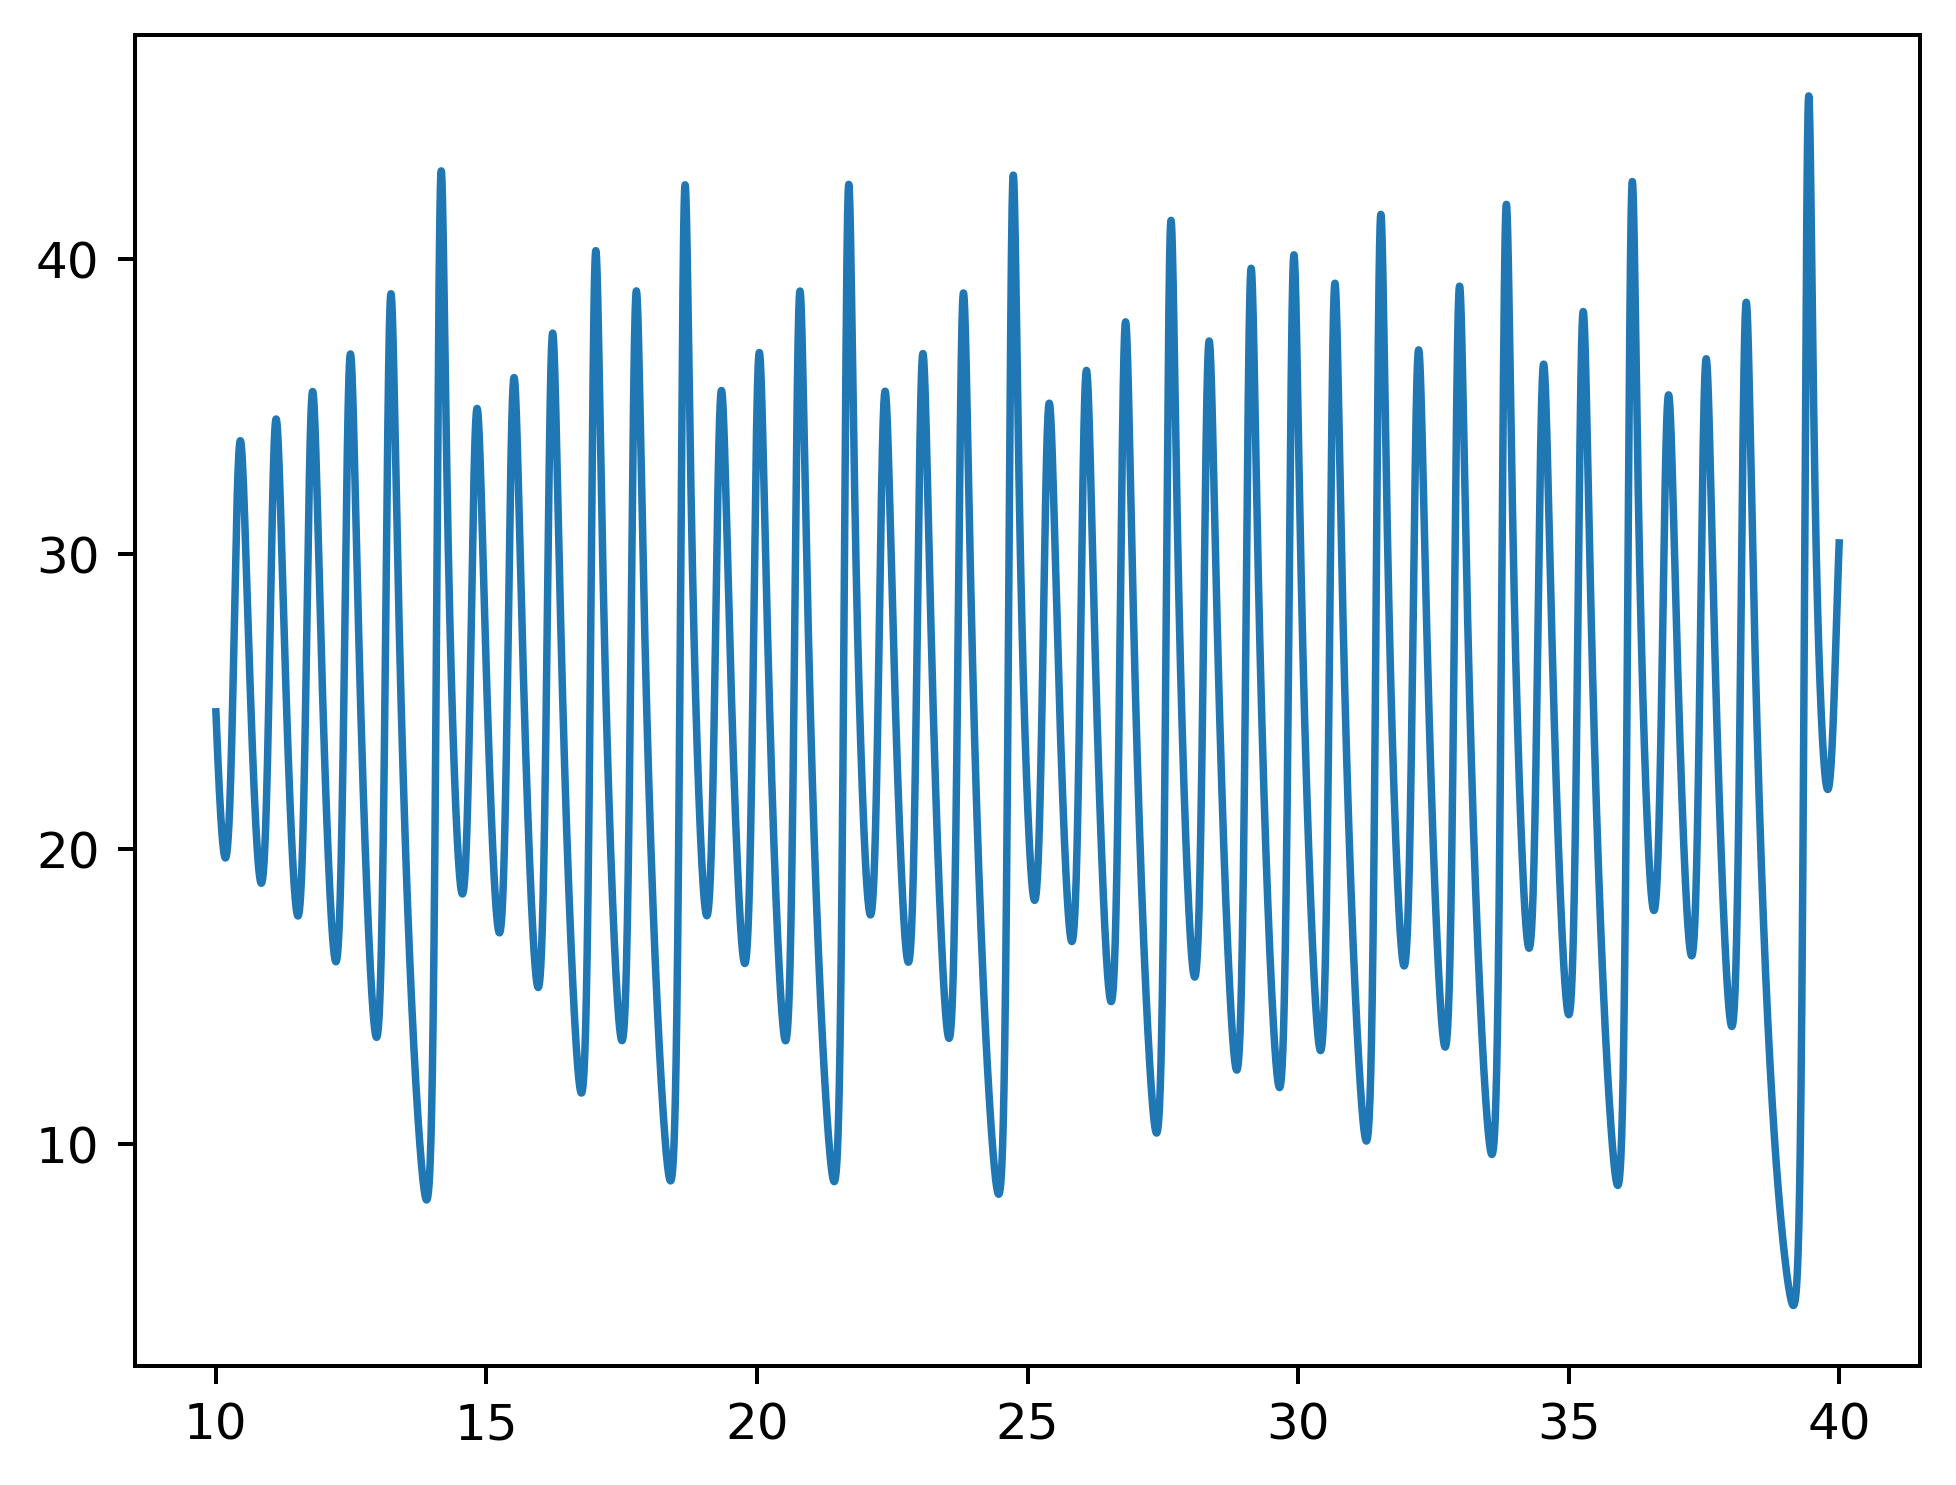

In [81]:
plt.plot(lorenz_40['time'], lorenz_40['z'])

In [92]:
lorenz_30 = getTimeDF(30, 13500)
lorenz_30 = lorenz_30.query('time > 10')

In [94]:
lorenz_30.to_csv('lorenz_30.csv')

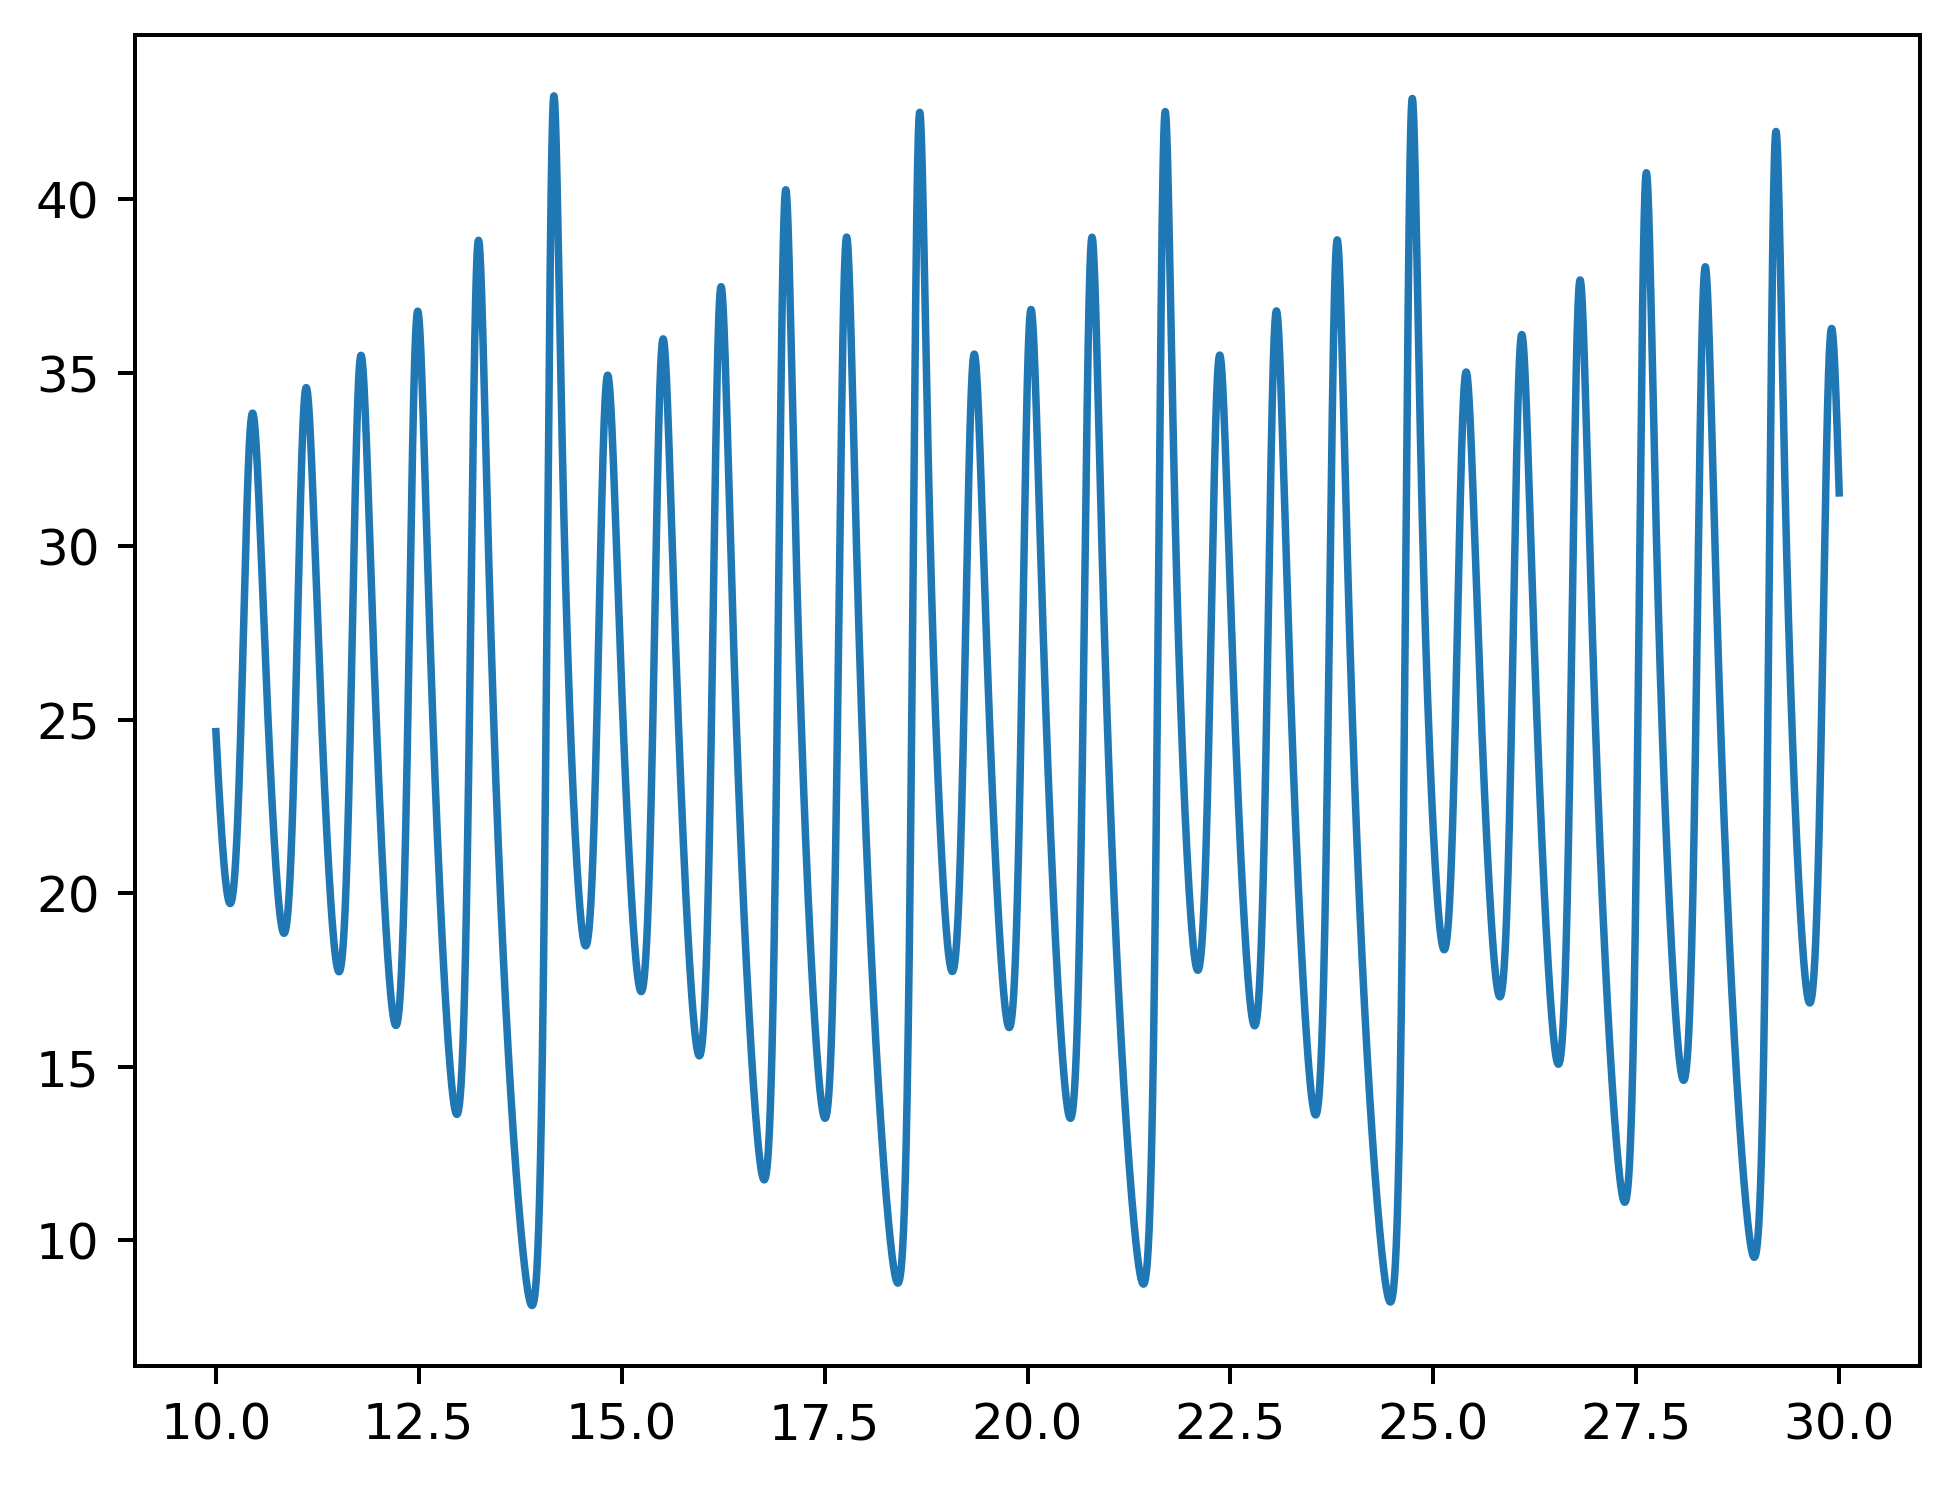

In [95]:
plt.plot(lorenz_30['time'], lorenz_30['z'])

In [102]:
lorenz_20 = getTimeDF(20, 18000)
lorenz_20 = lorenz_20.query('time > 10')

In [105]:
lorenz_20.to_csv('lorenz_20.csv')

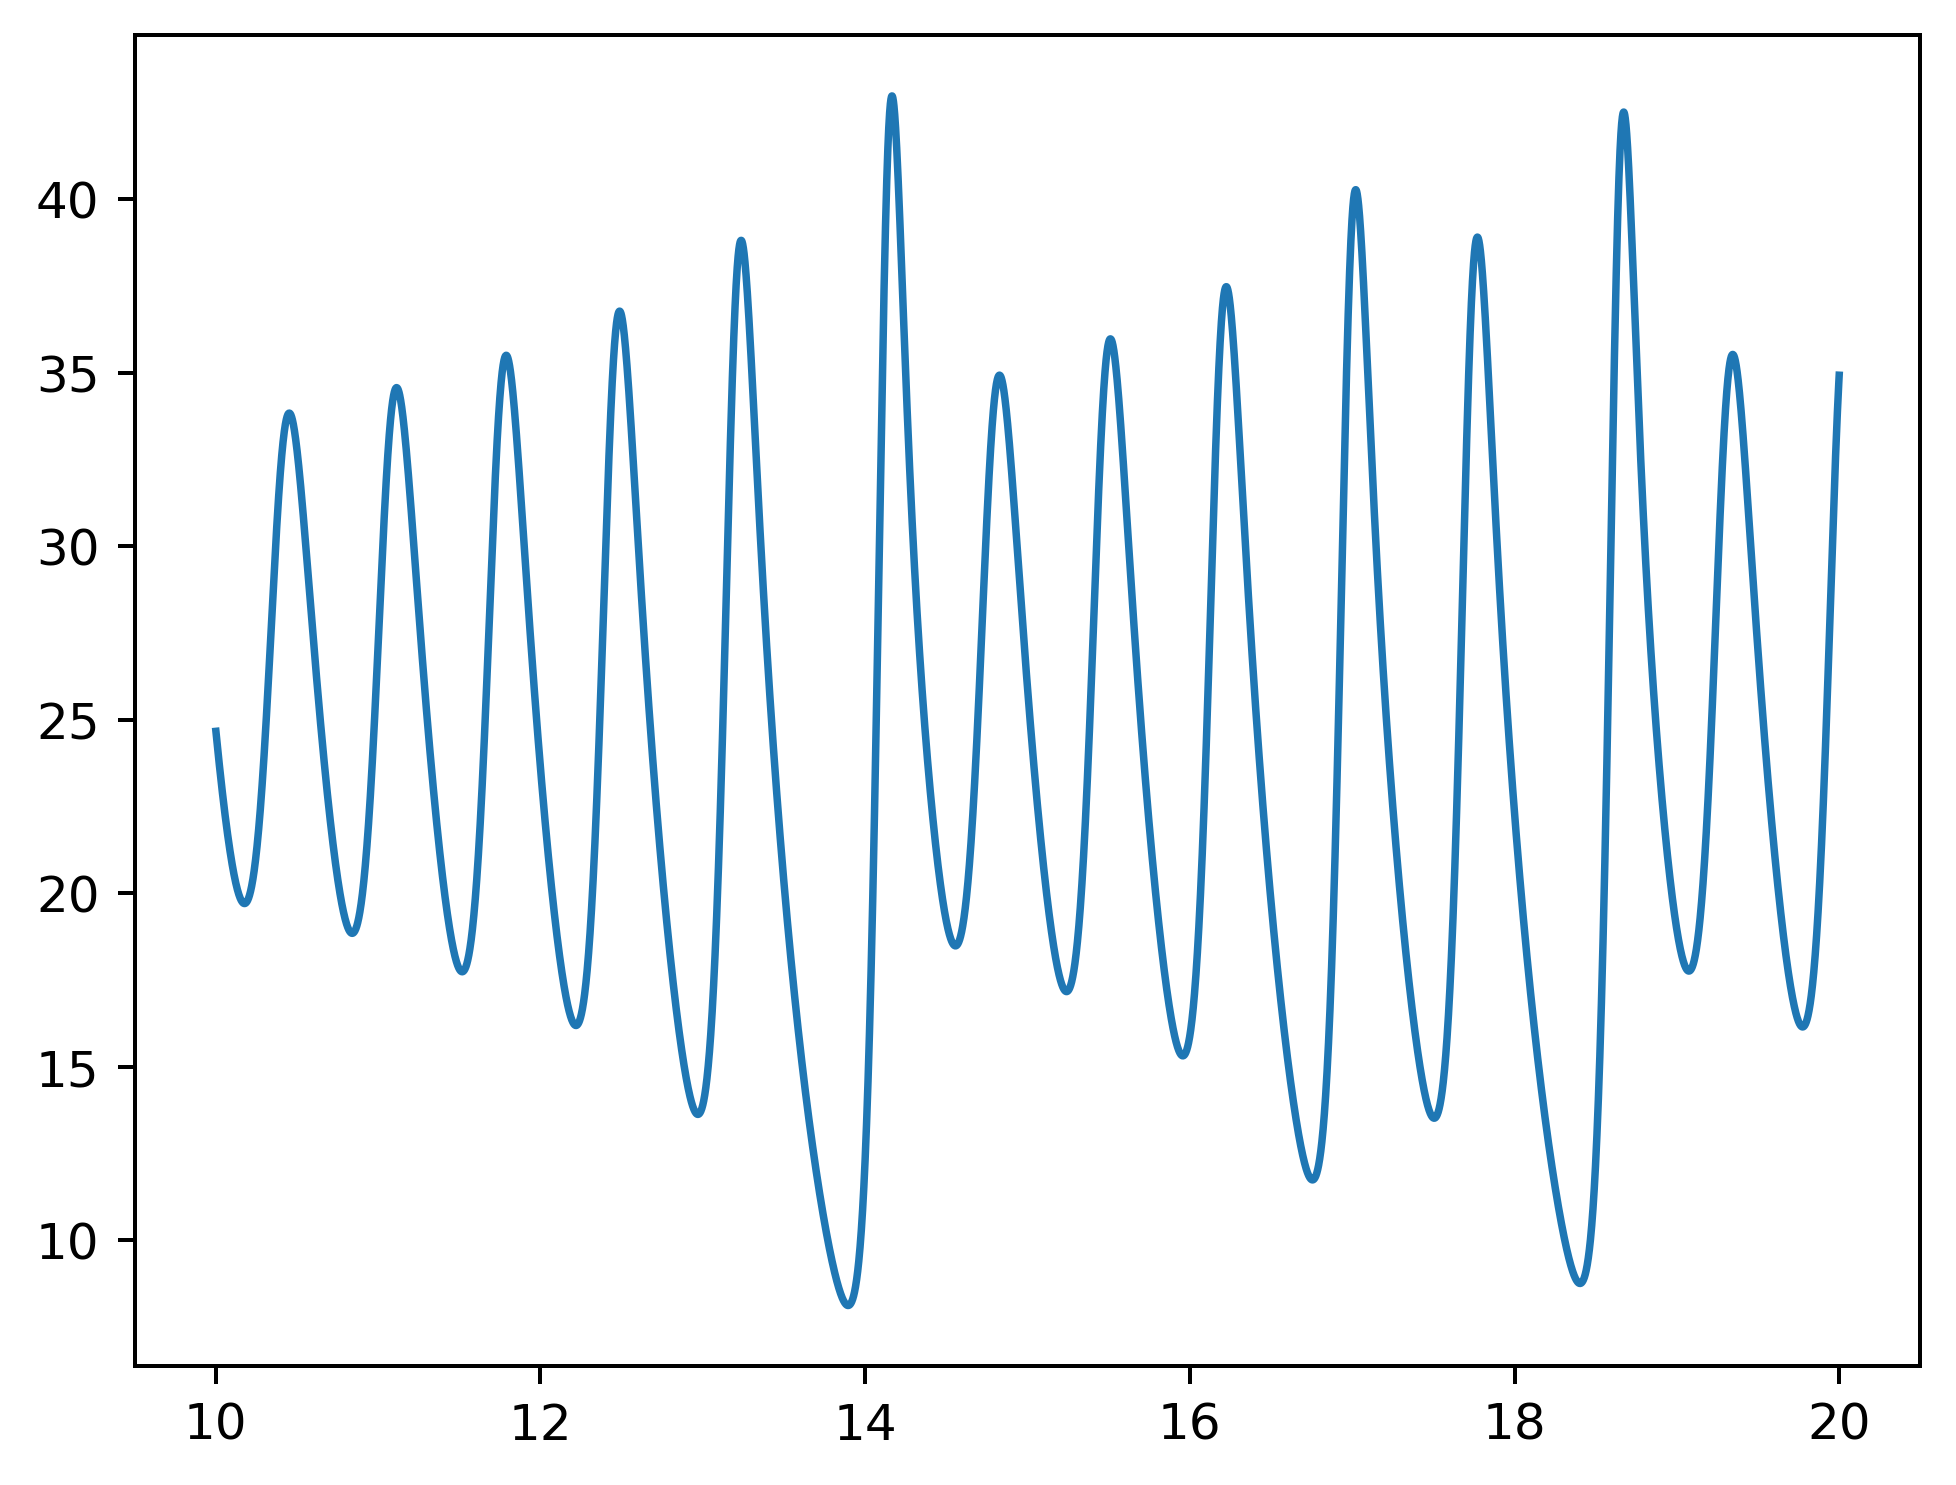

In [104]:
plt.plot(lorenz_20['time'], lorenz_20['z'])

In [7]:
lorenz100 = pd.read_csv('data/lorenz_100.csv')
lorenz70 = pd.read_csv('data/lorenz_70.csv')
lorenz40 = pd.read_csv('data/lorenz_40.csv')
lorenz20 = pd.read_csv('data/lorenz_20.csv')

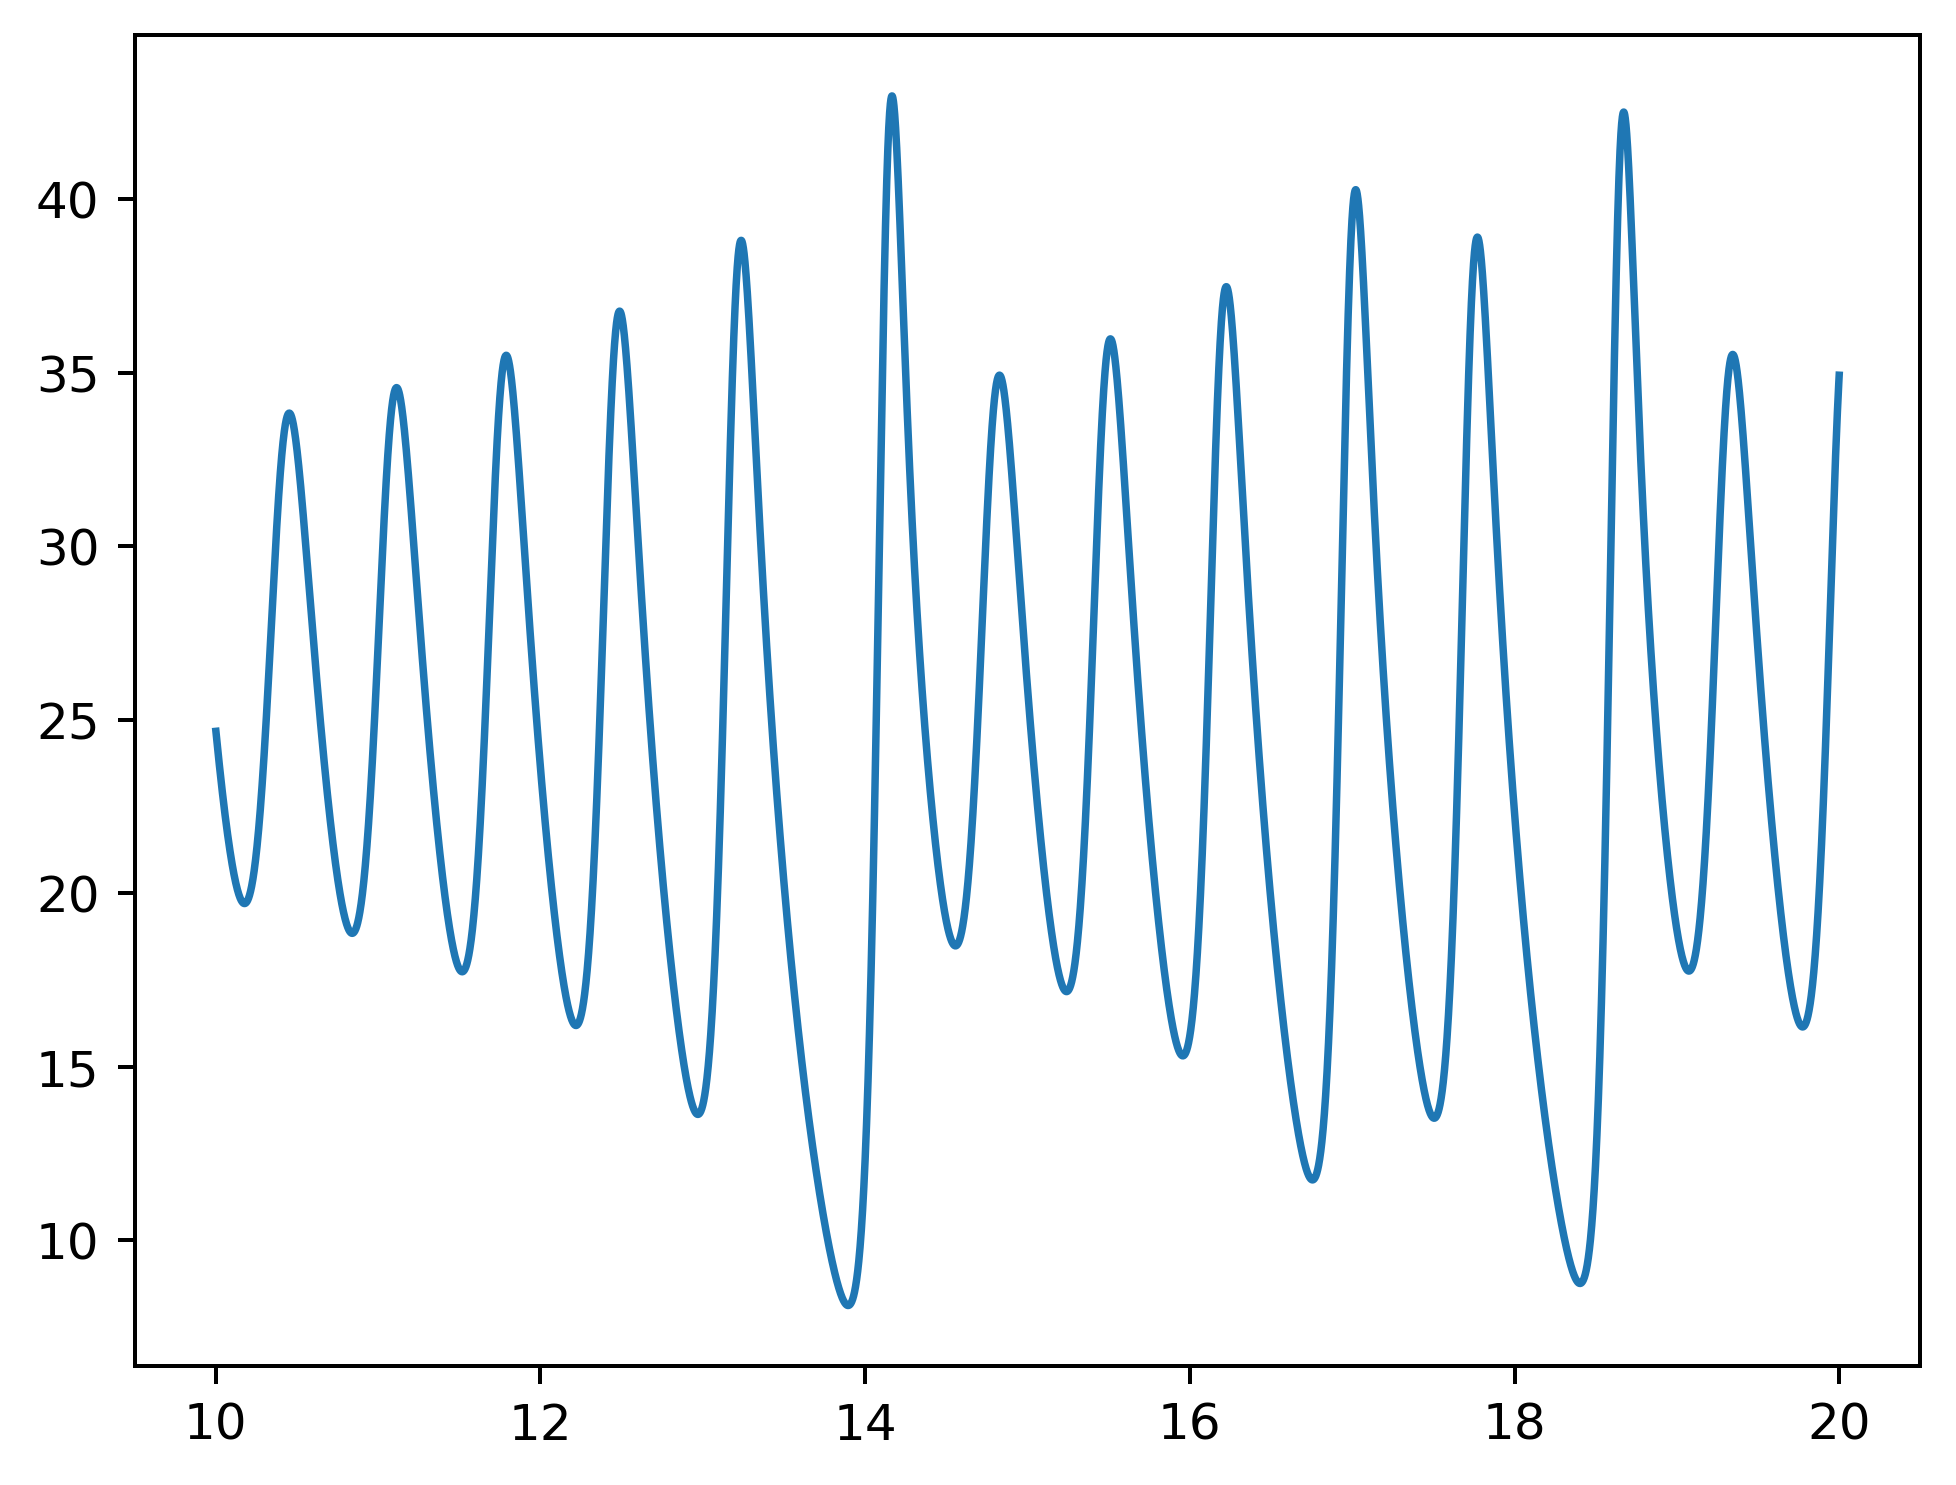

In [8]:
plt.plot(lorenz20['time'], lorenz20['z'])
plt.savefig("OL20.pdf")

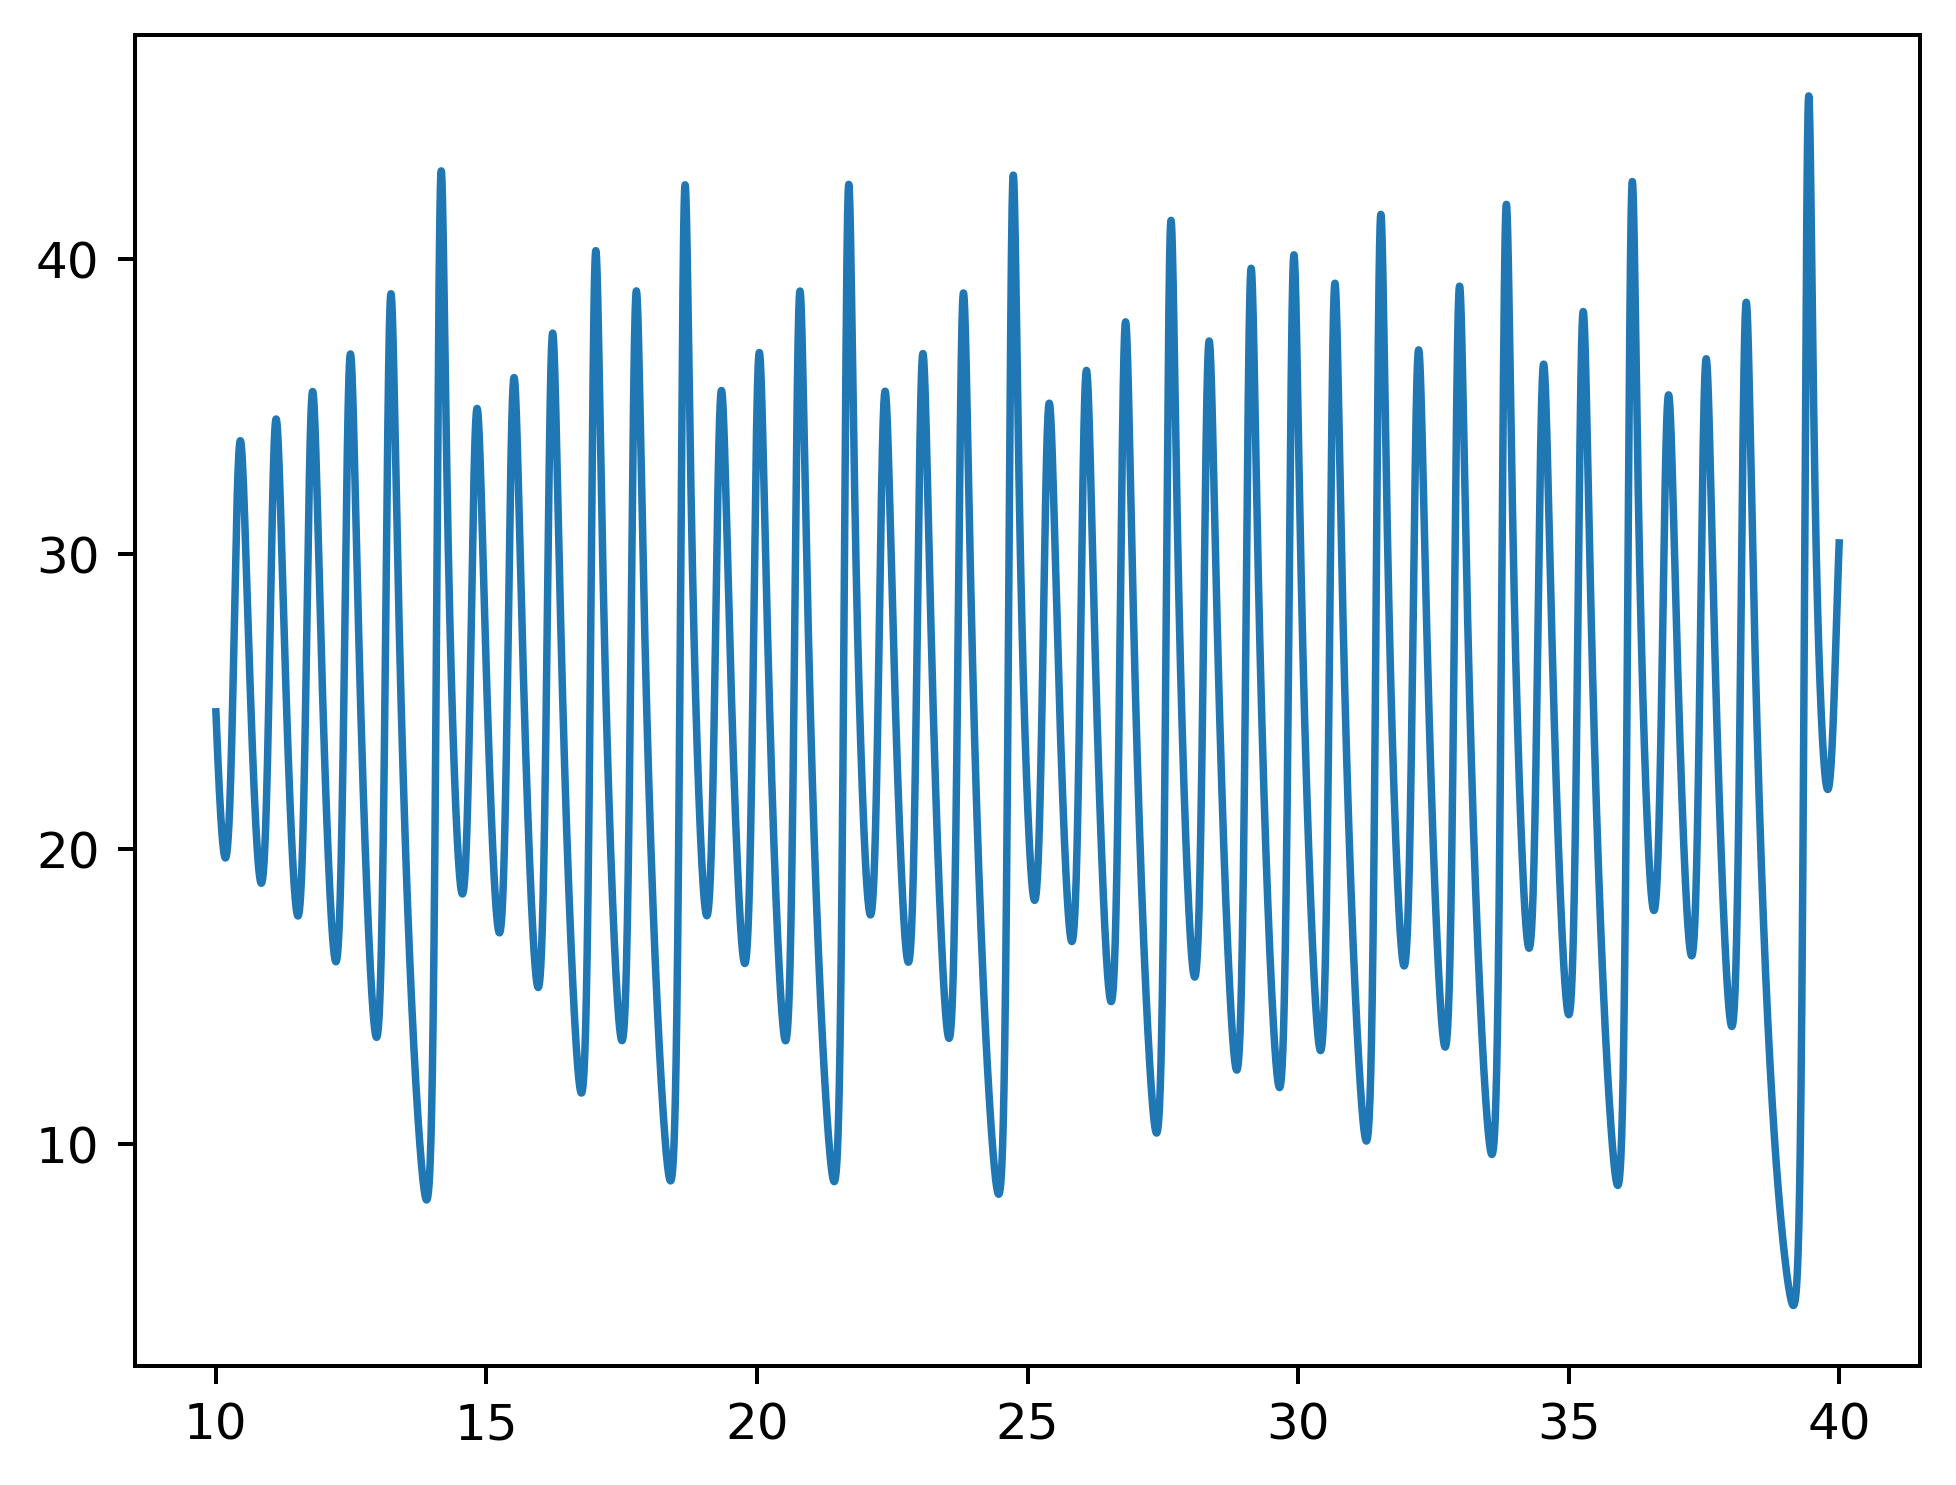

In [9]:
plt.plot(lorenz40['time'], lorenz40['z'])
plt.savefig("OL40.pdf")

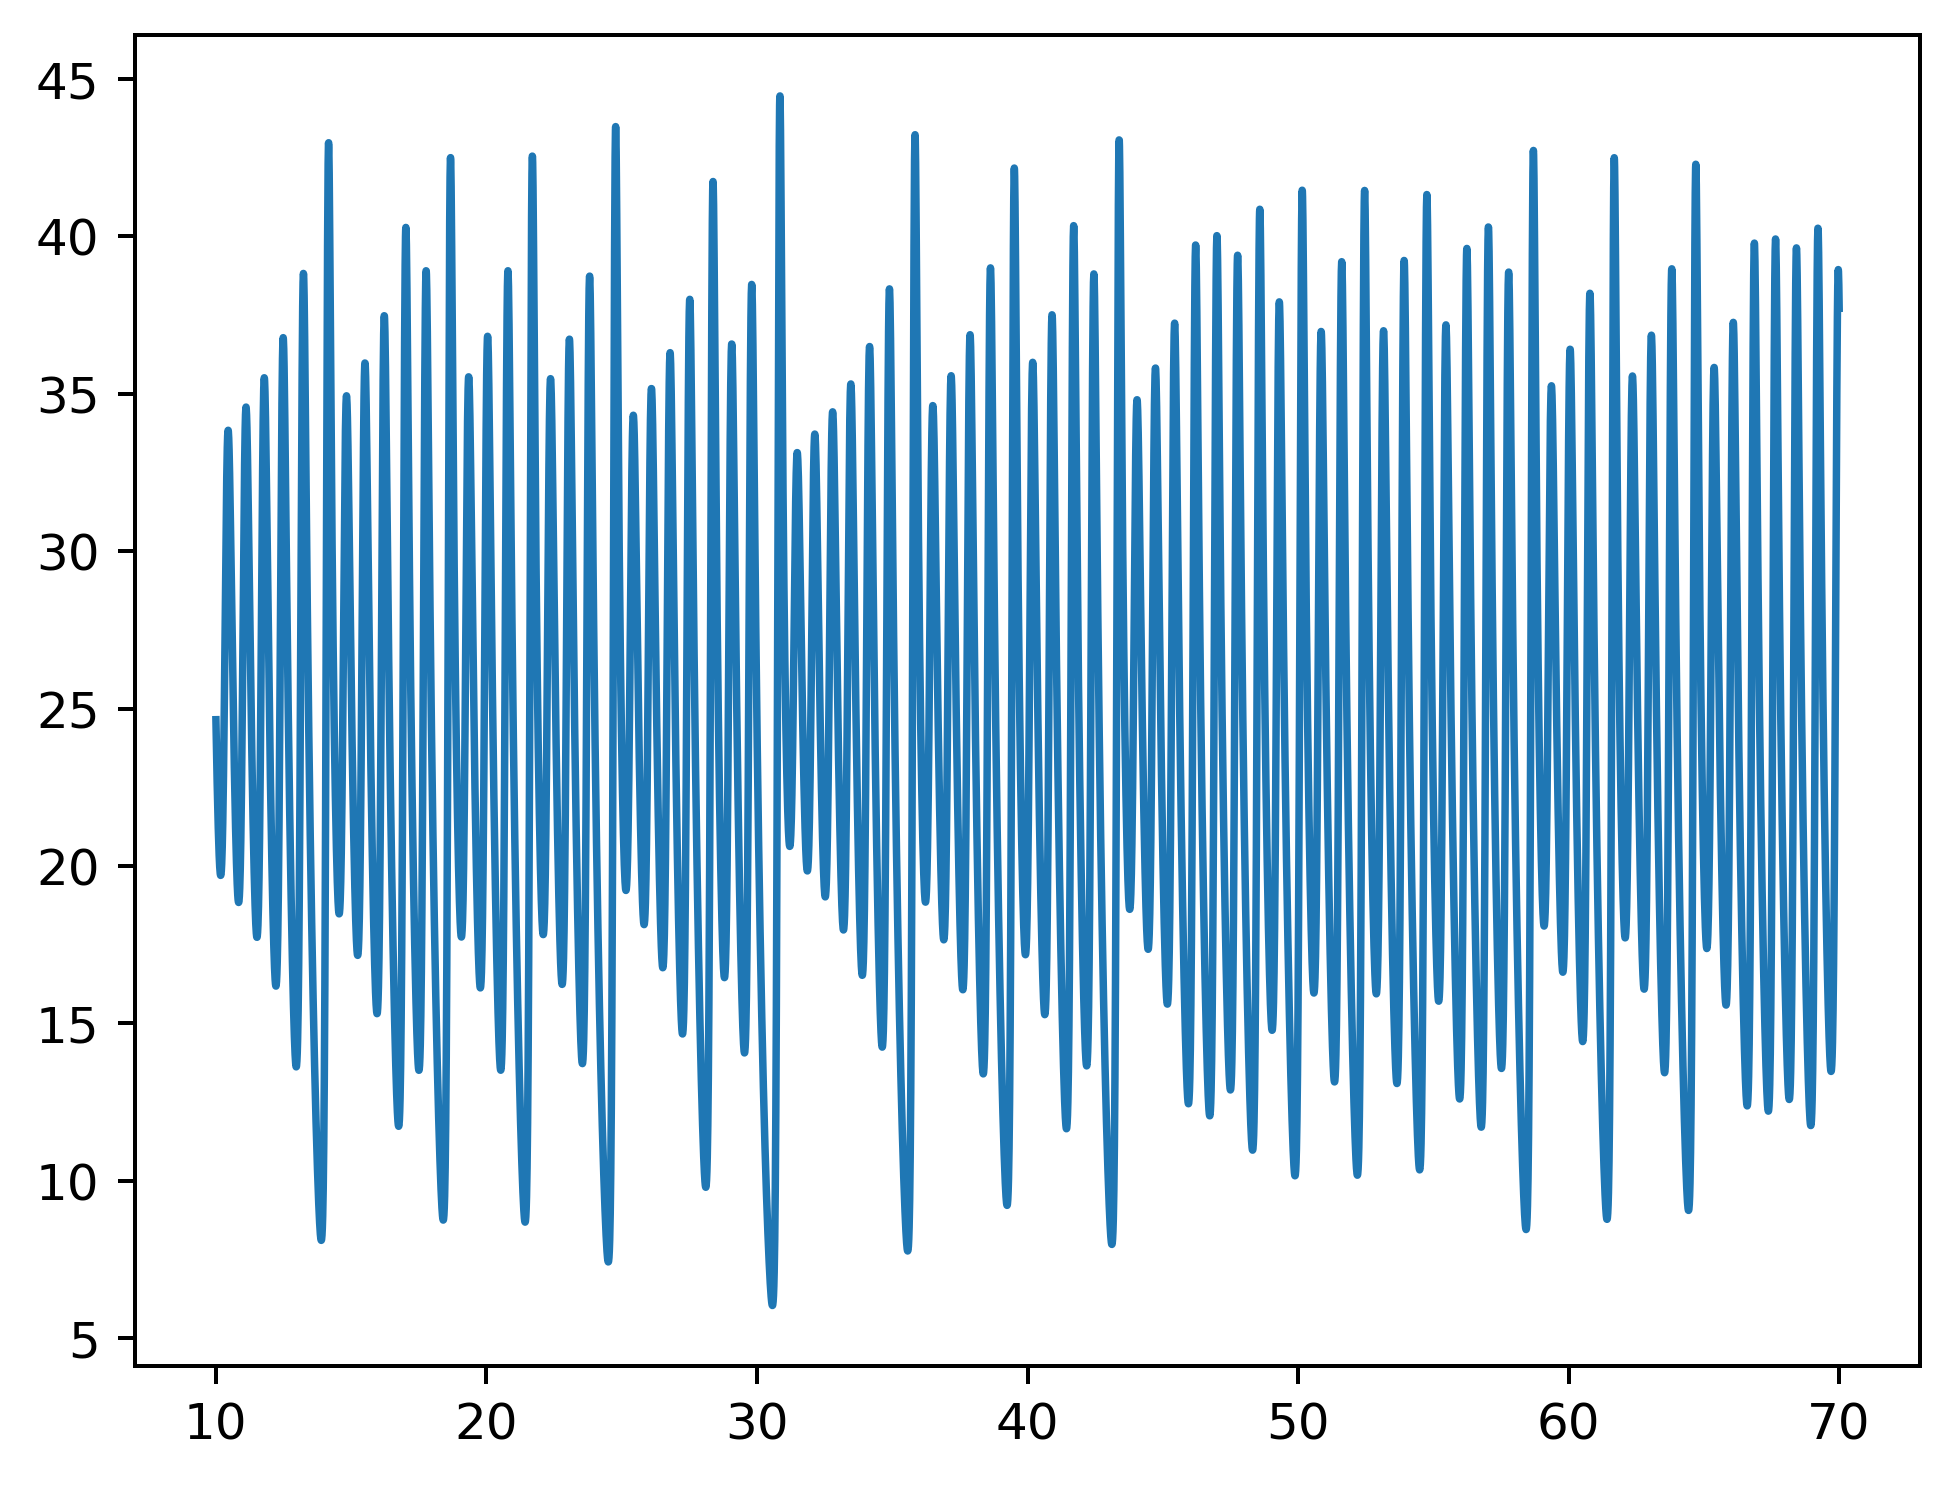

In [10]:
plt.plot(lorenz70['time'], lorenz70['z'])
plt.savefig("OL70.pdf")

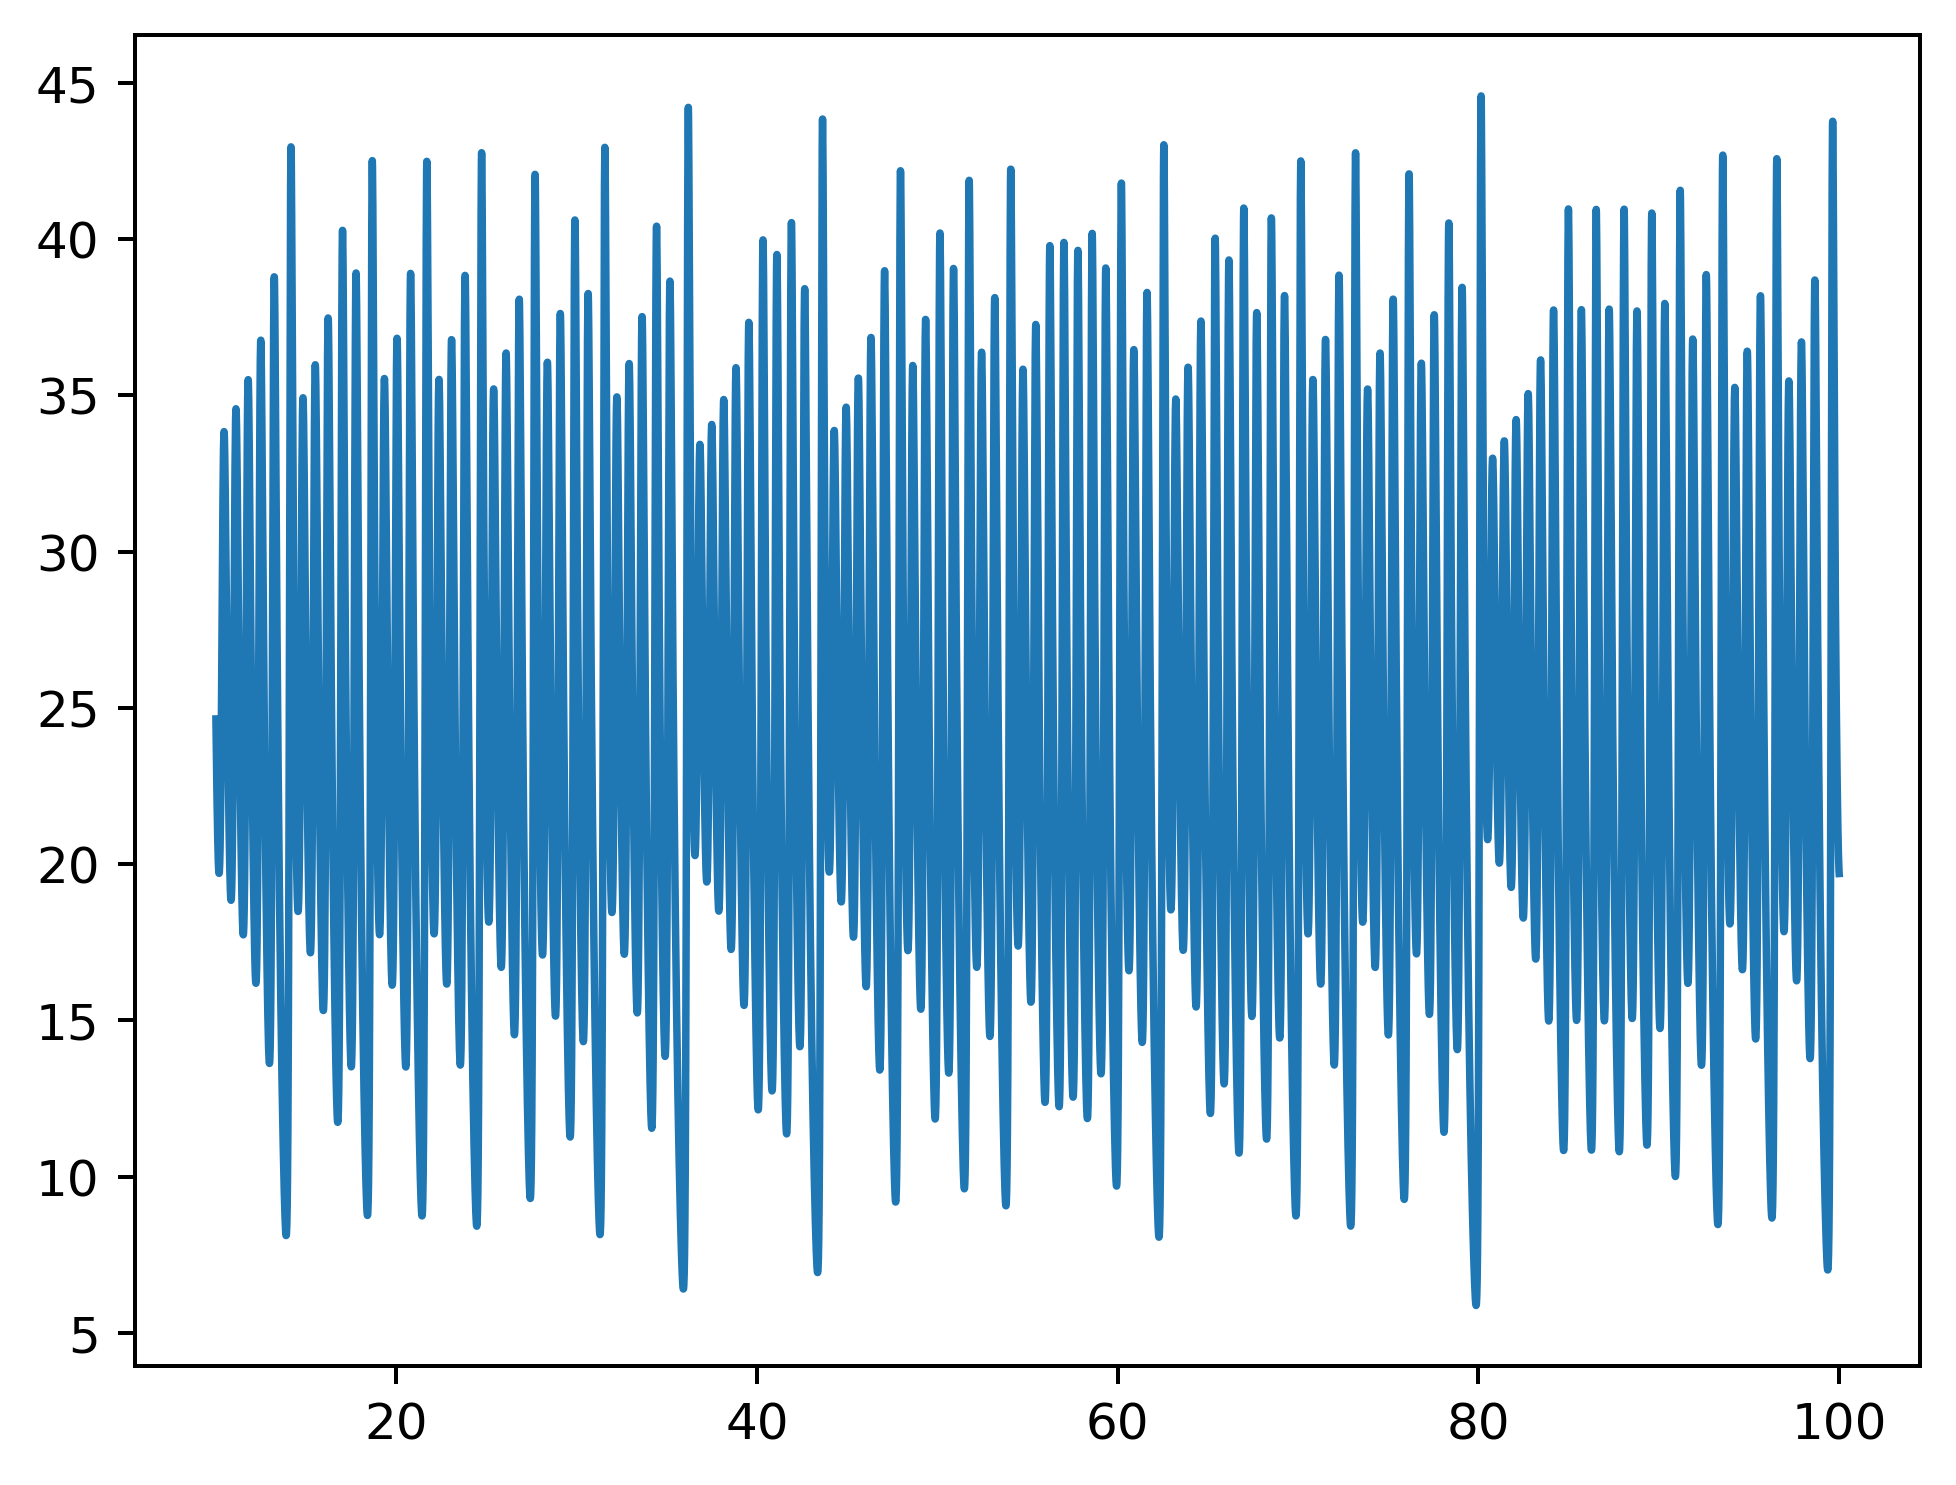

In [11]:
plt.plot(lorenz100['time'], lorenz100['z'])
plt.savefig("OL100.pdf")

In [19]:
OLS_z.test_rmse

0.207055956951616

In [64]:
ridge = joblib.load(r"C:\Users\alpez\Desktop\Proyectos\Chemputing\RC\ThesisResults\LR_Ridge.jb")
single = joblib.load(r"C:\Users\alpez\Desktop\Proyectos\Chemputing\RC\ThesisResults\LR_Single.jb")
uncoupled = joblib.load(r"C:\Users\alpez\Desktop\Proyectos\Chemputing\RC\ThesisResults\LR_Uncoupled.jb")
coupled_low = joblib.load(r"C:\Users\alpez\Desktop\Proyectos\Chemputing\RC\ThesisResults\LR_Coupled_low.jb")
coupled_high = joblib.load(r"C:\Users\alpez\Desktop\Proyectos\Chemputing\RC\ThesisResults\LR_Coupled_high.jb")

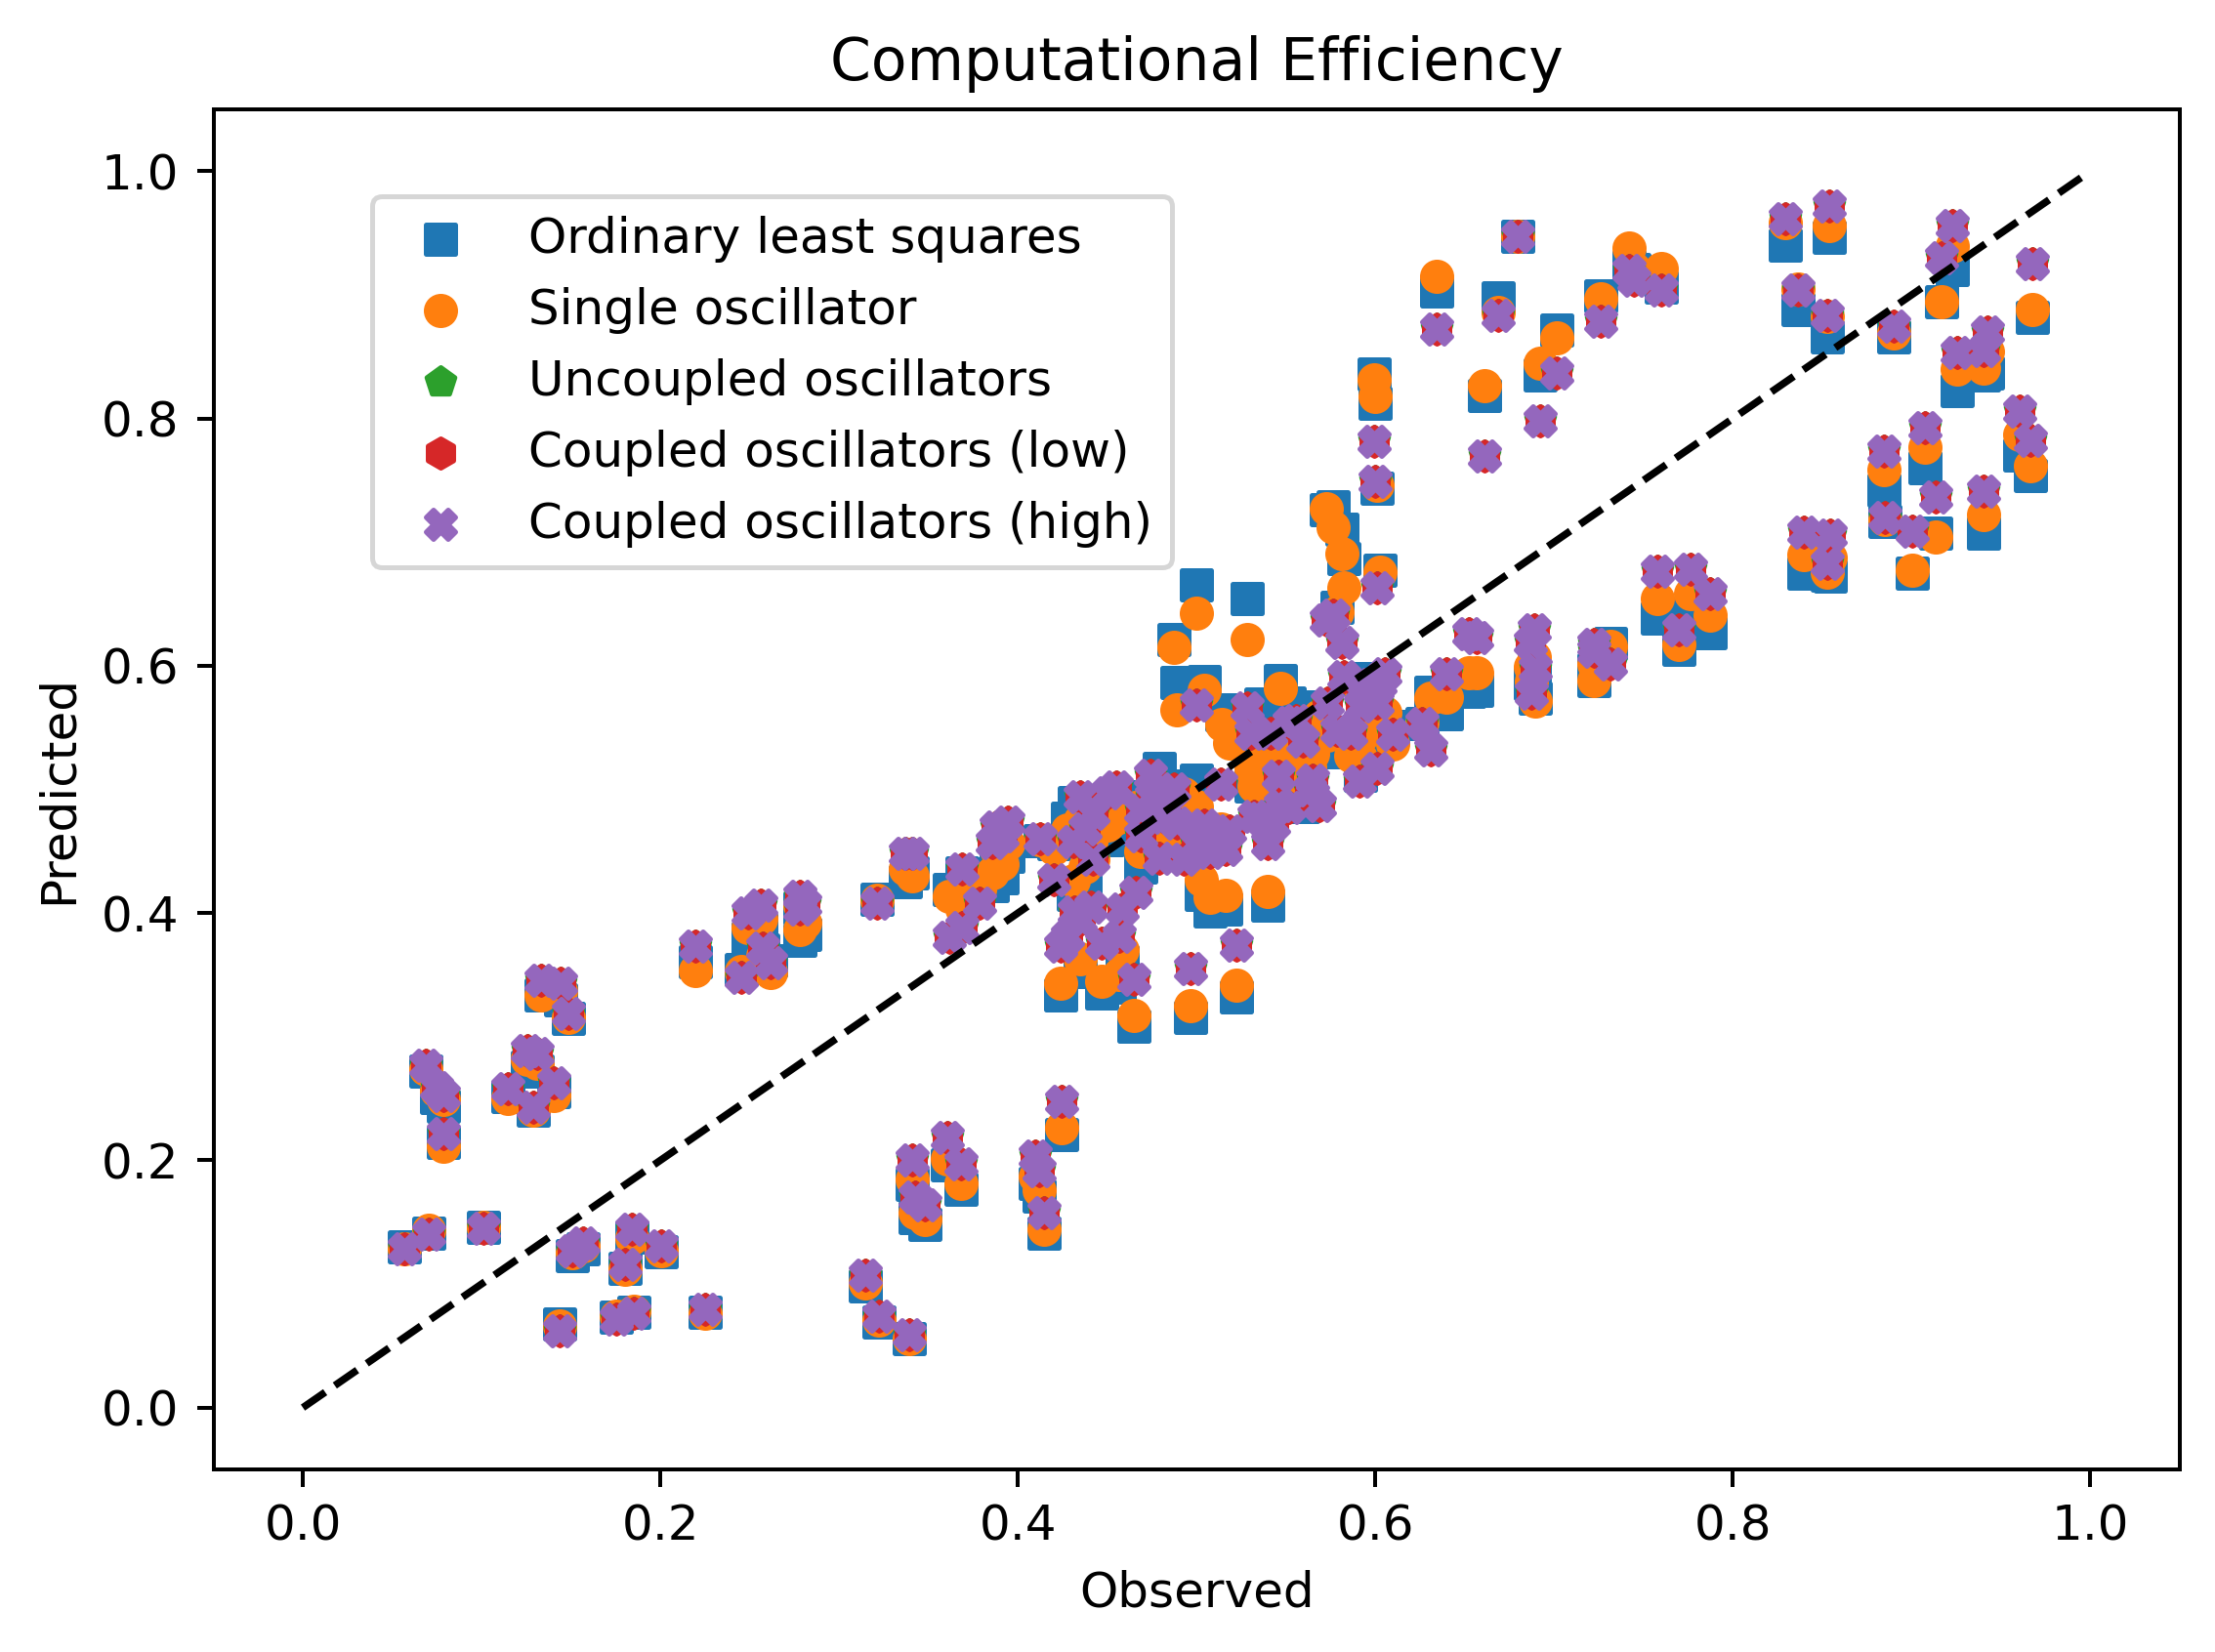

In [65]:
plt.figure(dpi=360)
plt.title("Computational Efficiency")
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.plot([0, 1], [0, 1], 'k--')
plt.scatter(ridge.test_true, ridge.test_predicted, c ="tab:blue", marker ="s", label="Ordinary least squares")
plt.scatter(ridge.test_true, single.test_predicted, c ="tab:orange", marker ="o", label="Single oscillator")
plt.scatter(ridge.test_true, uncoupled.test_predicted, c ="tab:green", marker ="p", label="Uncoupled oscillators")
plt.scatter(ridge.test_true, coupled_low.test_predicted, c ="tab:red", marker ="h", label="Coupled oscillators (low)")
plt.scatter(ridge.test_true, coupled_high.test_predicted, c ="tab:purple", marker ="X", label="Coupled oscillators (high)")
plt.legend(bbox_to_anchor = (0.5, 0.8), loc='center right') 
plt.tight_layout()

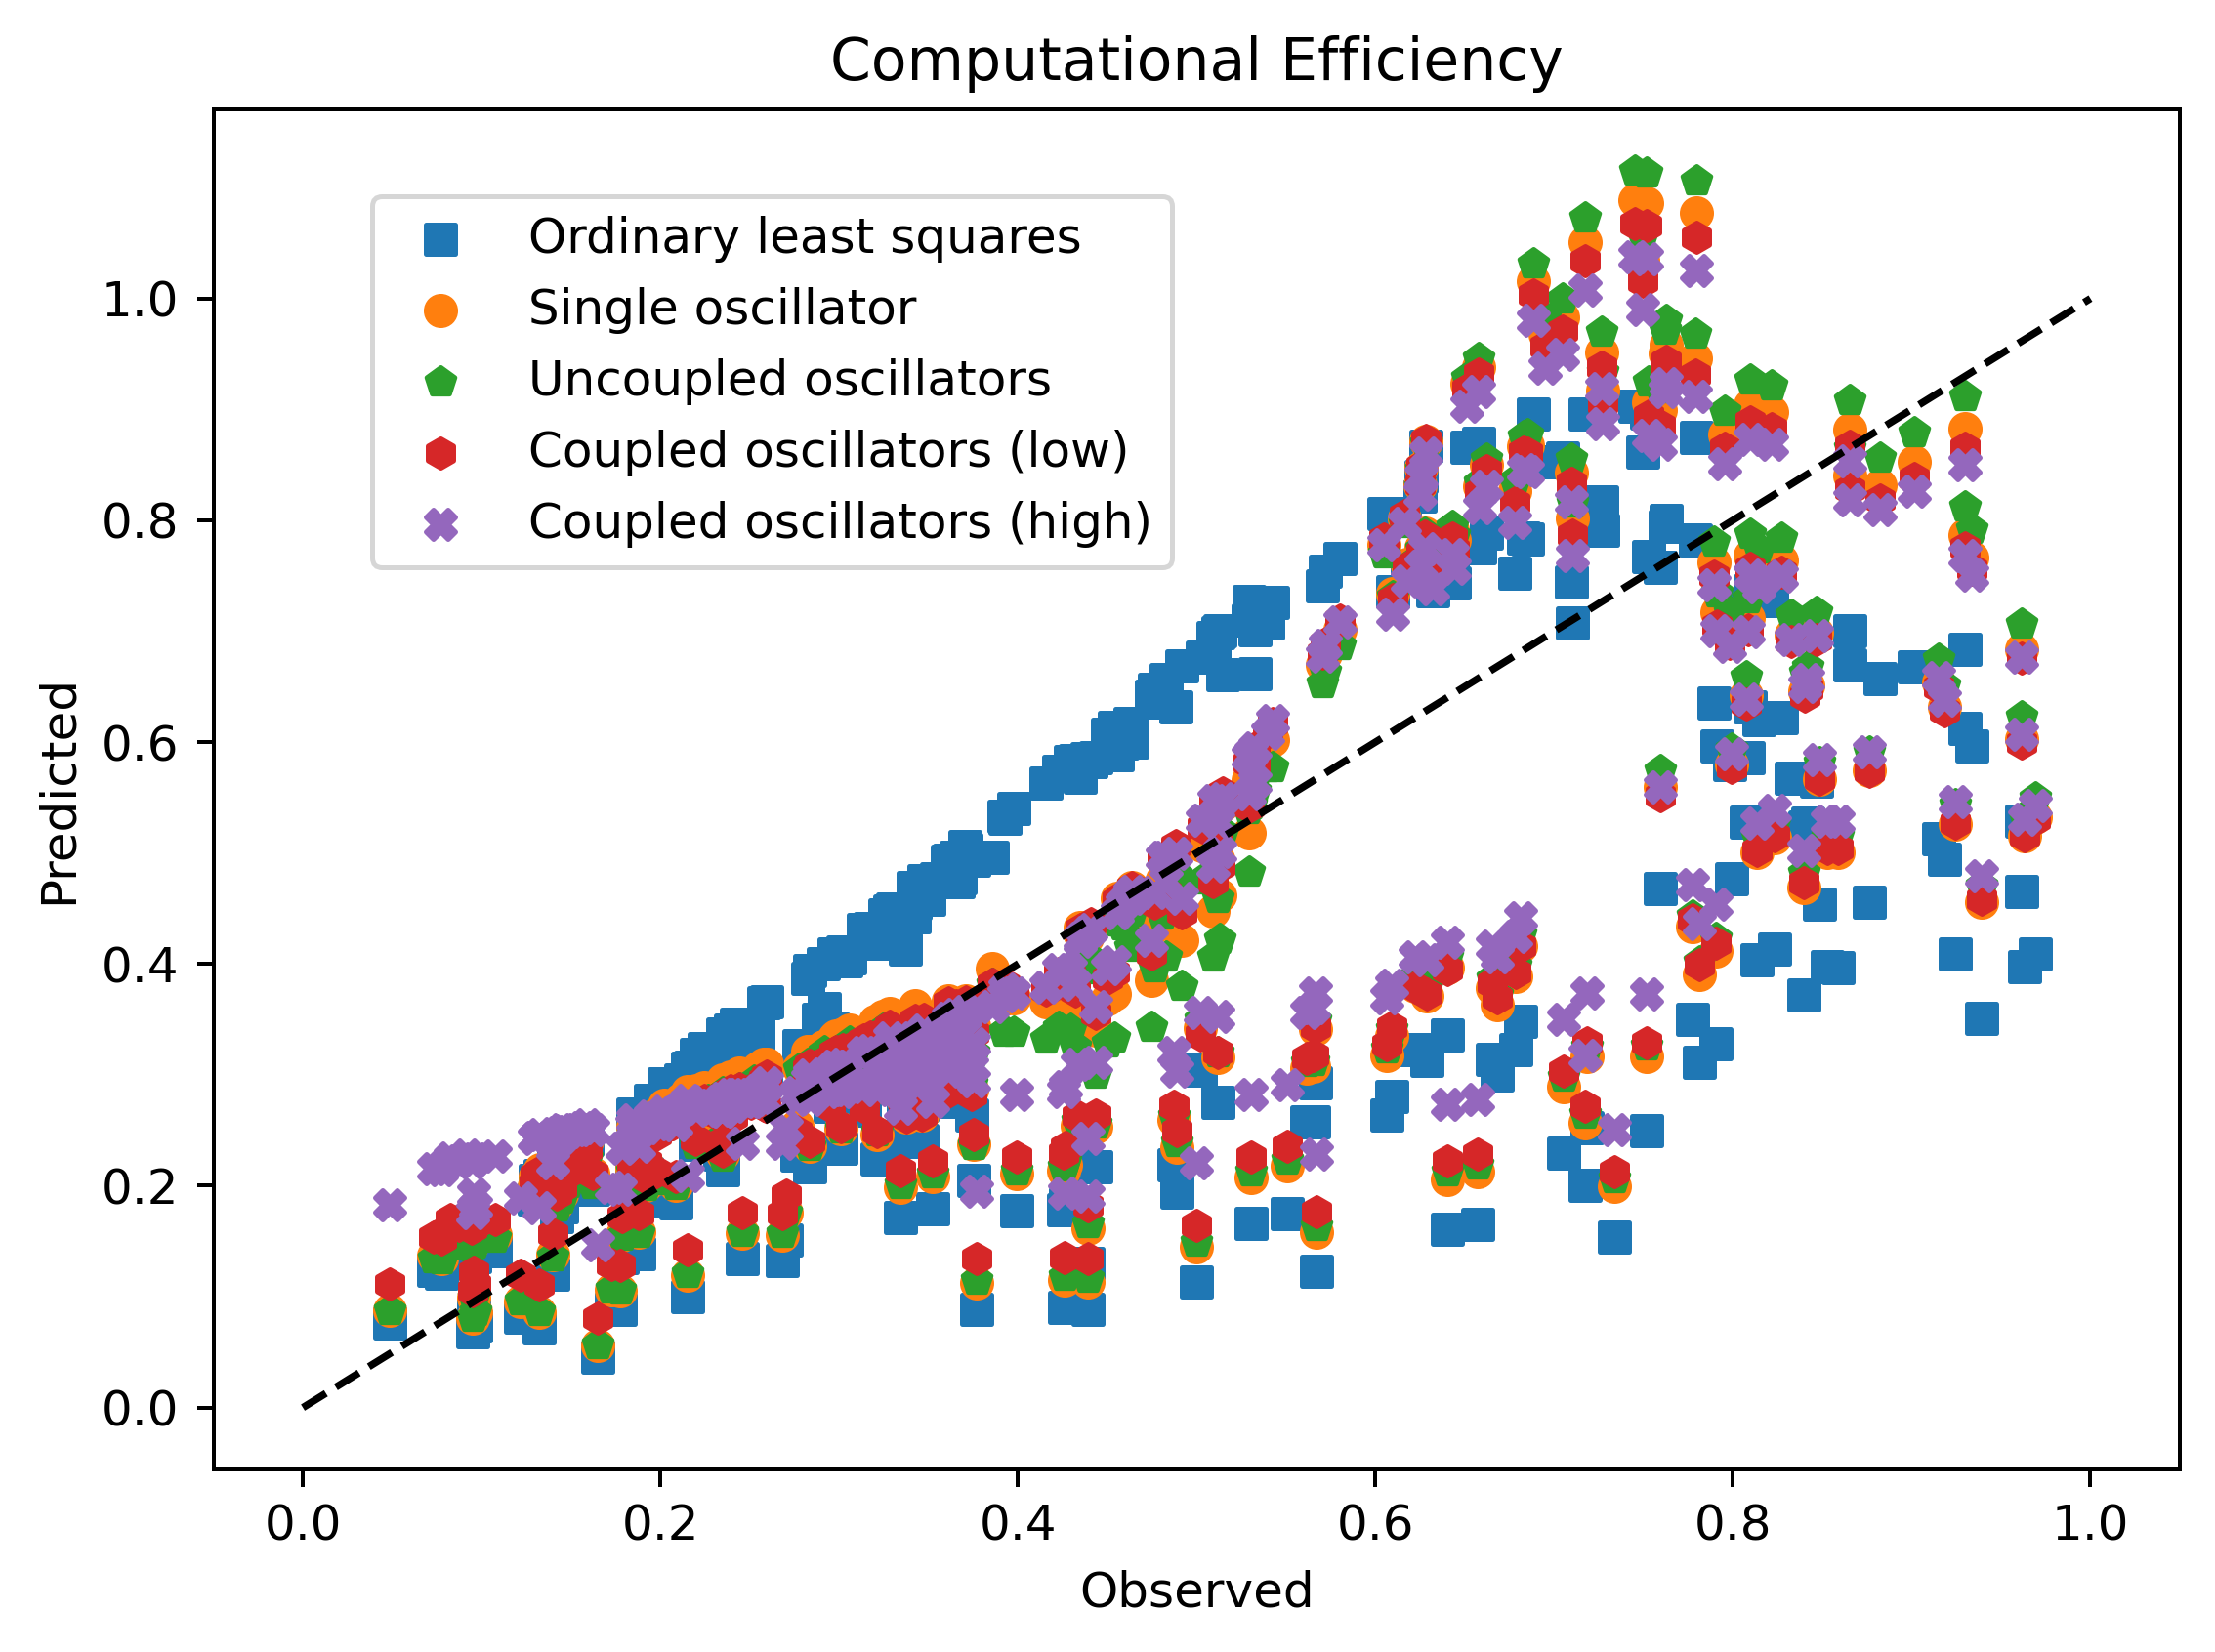

In [7]:
plt.figure(dpi=360)
plt.title("Computational Efficiency")
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.plot([0, 1], [0, 1], 'k--')
plt.scatter(OLS_z.test_true, OLS_z.test_predicted, c ="tab:blue", marker ="s", label="Ordinary least squares")
plt.scatter(OLS_z.test_true, single_z.test_predicted, c ="tab:orange", marker ="o", label="Single oscillator")
plt.scatter(OLS_z.test_true, uncoupled_z.test_predicted, c ="tab:green", marker ="p", label="Uncoupled oscillators")
plt.scatter(OLS_z.test_true, coupled_low_z.test_predicted, c ="tab:red", marker ="h", label="Coupled oscillators (low)")
plt.scatter(OLS_z.test_true, coupled_high_z.test_predicted, c ="tab:purple", marker ="X", label="Coupled oscillators (high)")
plt.legend(bbox_to_anchor = (0.5, 0.8), loc='center right') 
plt.tight_layout()
plt.savefig("myImagePDF.pdf", format="pdf")

In [86]:
data = {'Time': np.arange(0, len(OLS_z.test_true), 1),
        'Obs': OLS_z.test_true,
        'OLS': OLS_z.test_predicted,
        'Single': single_z.test_predicted,
        'Uncoupled': uncoupled_z.test_predicted,
        'Coupled_low': coupled_low_z.test_predicted,
        'Coupled_high': coupled_high_z.test_predicted}

df = pd.DataFrame(data)

<Axes: xlabel='Time'>

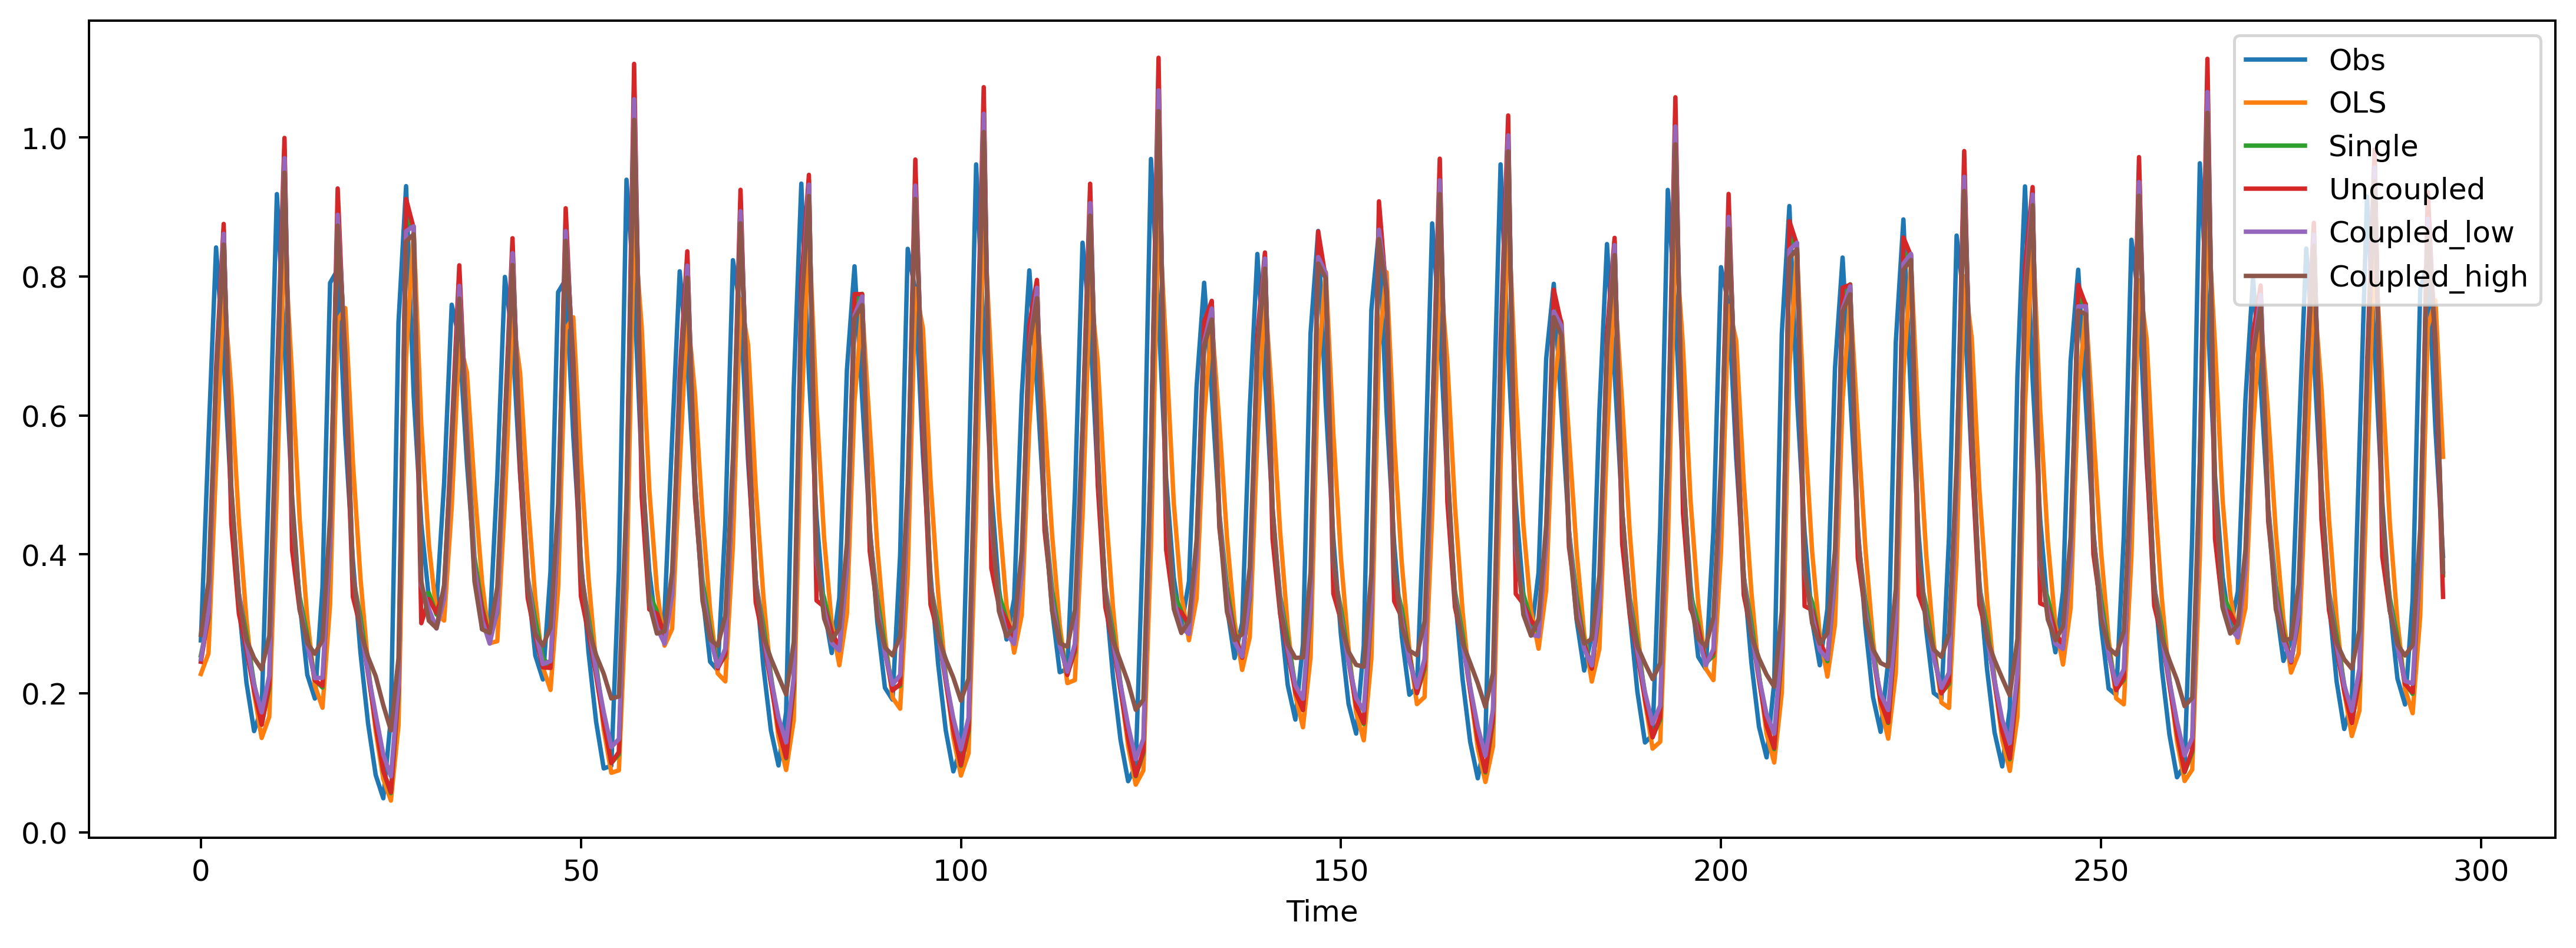

In [115]:
df.plot(x="Time", y=["Obs", "OLS", "Single", "Uncoupled", "Coupled_low", "Coupled_high"], kind="line", figsize=(15, 5))

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_excel('results.xlsx')
df

Model Oscillatory Level Initial Condition  \
0              Ridge Regression        Lorenz 100          In-phase   
1              Ridge Regression        Lorenz 100      Out-of-phase   
2              Ridge Regression        Lorenz 100        Anti-phase   
3              Ridge Regression         Lorenz 90          In-phase   
4              Ridge Regression         Lorenz 90      Out-of-phase   
..                          ...               ...               ...   
292  Coupled Oscillators (high)         Lorenz 20           Out/Out   
293  Coupled Oscillators (high)         Lorenz 20          Out/Anti   
294  Coupled Oscillators (high)         Lorenz 20           Anti/In   
295  Coupled Oscillators (high)         Lorenz 20          Anti/Out   
296  Coupled Oscillators (high)         Lorenz 20         Anti/Anti   

     RMSE (test)  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
..           ...  
292          NaN  
293          NaN  
294          NaN  
295          NaN  
296          NaN  

[297 rows x 4 columns]

In [4]:
df['RMSE (test)'][0] = 0.123123
df['RMSE (test)'][0]

0.123123

In [15]:
df[278:298]

Model Oscillatory Level Initial Condition  \
278  Coupled Oscillators (high)         Lorenz 40         Anti/Anti   
279  Coupled Oscillators (high)         Lorenz 30             In/In   
280  Coupled Oscillators (high)         Lorenz 30            In/Out   
281  Coupled Oscillators (high)         Lorenz 30           In/Anti   
282  Coupled Oscillators (high)         Lorenz 30            Out/In   
283  Coupled Oscillators (high)         Lorenz 30           Out/Out   
284  Coupled Oscillators (high)         Lorenz 30          Out/Anti   
285  Coupled Oscillators (high)         Lorenz 30           Anti/In   
286  Coupled Oscillators (high)         Lorenz 30          Anti/Out   
287  Coupled Oscillators (high)         Lorenz 30         Anti/Anti   
288  Coupled Oscillators (high)         Lorenz 20             In/In   
289  Coupled Oscillators (high)         Lorenz 20            In/Out   
290  Coupled Oscillators (high)         Lorenz 20           In/Anti   
291  Coupled Oscillators (high)         Lorenz 20            Out/In   
292  Coupled Oscillators (high)         Lorenz 20           Out/Out   
293  Coupled Oscillators (high)         Lorenz 20          Out/Anti   
294  Coupled Oscillators (high)         Lorenz 20           Anti/In   
295  Coupled Oscillators (high)         Lorenz 20          Anti/Out   
296  Coupled Oscillators (high)         Lorenz 20         Anti/Anti   

     RMSE (test)  
278          NaN  
279          NaN  
280          NaN  
281          NaN  
282          NaN  
283          NaN  
284          NaN  
285          NaN  
286          NaN  
287          NaN  
288          NaN  
289          NaN  
290          NaN  
291          NaN  
292          NaN  
293          NaN  
294          NaN  
295          NaN  
296          NaN